# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** YYYY/YYYY

### Team Members (Alphabetical Order):
1. Surname1, Name1 (StudentID1);
2. Surname2, Name2 (StudentID2).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [357658, 359806]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Healthy eating
History
Psychology
Politics
Internet
Economy Management
Chemistry
Reading
Geography
Foreign languages
Medicine
Cars
Art exhibitions
Religion
Countryside, outdoors
Musical instruments
Writing
Passive sport
Active sport
Shopping
Science and technology
Movies
Thriller
Comedy
Romantic
War
Fantasy/Fairy tales
Animated
Documentary
Western
Slow songs or fast songs
Dance
Folk
Country
Classical music
Rock
Reggae, Ska
Swing, Jazz
Latino
Opera
Daily events
Prioritising workload
Writing notes
Workaholism
Final judgement
Keeping promises
Loss of interest
Fake
Criminal damage
Self-criticism
Judgment calls
Empathy
Eating to survive
Giving
Compassion to animals
Borrowed stuff
Cheating in school
Health
God
Number of friends
Punctuality
Lying
Mood swings
Appearence and gestures
Socializing
Achievements
Chi

Shopping centres  Branded clothing  Entertainment spending  \
666                 5                 4                       3   
93                  2                 2                       3   
442                 4                 4                       5   
495                 3                 5                       4   
327                 4                 2                       1   
..                ...               ...                     ...   
462                 1                 1                       2   
221                 5                 1                       1   
92                  2                 3                       5   
594                 2                 4                       4   
371                 4                 1                       4   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
666                  5                    4                           5   
93                   2                    2                           3   
442                  4                    4                           5   
495                  5                    5                           3   
327                  3                    2                           4   
..                 ...                  ...                         ...   
462                  1                    1                           4   
221                  1                    1                           3   
92                   1                    4                           2   
594                  5                    5                           5   
371                  2                    1                           4   

     Healthy eating  History  Psychology  Politics  ...  Age  Height  Weight  \
666               5        3           3         2  ...   16     153      62   
93                3        5           2         1  ...   23     156      56   
442               3        5           2         5  ...   23     179      77   
495               1        1           1         1  ...   19     175      80   
327               4        1           3         2  ...   19     175      58   
..              ...      ...         ...       ...  ...  ...     ...     ...   
462               3        3           4         2  ...   21     185      70   
221               3        2           2         2  ...   19     176      68   
92                2        1           3         3  ...   21     180      85   
594               5        2           4         4  ...   26     182      76   
371               1        5           5         2  ...   28     172      50   

     Number of siblings  Gender   Hand         Education  Only child  \
666                   1  female  right    primary school          no   
93                    0  female  right    masters degree         yes   
442                   1    male  right  secondary school         yes   
495                   1    male   left  secondary school         yes   
327                   1  female  right  secondary school          no   
..                  ...     ...    ...               ...         ...   
462                   0  female   left  secondary school         yes   
221                   2  female  right  secondary school          no   
92                    2    male  right  secondary school          no   
594                   3    male   left  secondary school         yes   
371                   2  female  right  secondary school          no   

     Home Town Type       Home Type  
666            city  block of flats  
93             city  house/bungalow  
442         village  house/bungalow  
495         village  house/bungalow  
327         village  house/bungalow  
..              ...             ...  
462            city  block of flats  
221            city  block of flats  
92             city  block of flats  
594            city  house/bungalow  
371            city  block of flats  

[506 rows x 103 


*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


Shopping centres  Branded clothing  Entertainment spending  \
666                 5                 4                       3   
93                  2                 2                       3   
442                 4                 4                       5   
495                 3                 5                       4   
327                 4                 2                       1   
..                ...               ...                     ...   
462                 1                 1                       2   
221                 5                 1                       1   
92                  2                 3                       5   
594                 2                 4                       4   
371                 4                 1                       4   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
666                  5                    4                           5   
93                   2                    2                           3   
442                  4                    4                           5   
495                  5                    5                           3   
327                  3                    2                           4   
..                 ...                  ...                         ...   
462                  1                    1                           4   
221                  1                    1                           3   
92                   1                    4                           2   
594                  5                    5                           5   
371                  2                    1                           4   

     Healthy eating  History  Psychology  Politics  ...  \
666               5        3           3         2  ...   
93                3        5           2         1  ...   
442               3        5           2         5  ...   
495               1        1           1         1  ...   
327               4        1           3         2  ...   
..              ...      ...         ...       ...  ...   
462               3        3           4         2  ...   
221               3        2           2         2  ...   
92                2        1           3         3  ...   
594               5        2           4         4  ...   
371               1        5           5         2  ...   

     Questionnaires or polls           Internet usage  Flying  Darkness  \
666                        2          few hours a day       1         1   
93                         4          few hours a day       4         1   
442                        3          few hours a day       1         1   
495                        2  less than an hour a day       3         1   
327                        3  less than an hour a day       3         5   
..                       ...                      ...     ...       ...   
462                        3          few hours a day       3         2   
221                        3          few hours a day       1         2   
92                         3          few hours a day       1         1   
594                        2  less than an hour a day       3         2   
371                        2          most of the day       1         3   

     Heights  Spiders  Snakes  Ageing  Dangerous dogs  Fear of public speaking  
666        1        1       1       5               3                        2  
93         2        2       4       2               2                        2  
442        2        1       2       2               4                        3  
495        5        3       5       2               3                        3  
327        4        4       5       2               5                        5  
..       ...      ...     ...     ...             ...                      ...  
462        1        1       2       3               5                        5  
221        1        5       4       1    


*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


Age  Height  Weight  Number of siblings  Gender   Hand         Education  \
666   16     153      62                   1  female  right    primary school   
93    23     156      56                   0  female  right    masters degree   
442   23     179      77                   1    male  right  secondary school   
495   19     175      80                   1    male   left  secondary school   
327   19     175      58                   1  female  right  secondary school   
..   ...     ...     ...                 ...     ...    ...               ...   
462   21     185      70                   0  female   left  secondary school   
221   19     176      68                   2  female  right  secondary school   
92    21     180      85                   2    male  right  secondary school   
594   26     182      76                   3    male   left  secondary school   
371   28     172      50                   2  female  right  secondary school   

    Only child Home Town Type       Home Type  
666         no           city  block of flats  
93         yes           city  house/bungalow  
442        yes        village  house/bungalow  
495        yes        village  house/bungalow  
327         no        village  house/bungalow  
..         ...            ...             ...  
462        yes           city  block of flats  
221         no           city  block of flats  
92          no           city  block of flats  
594        yes           city  house/bungalow  
371         no           city  block of flats  

[506 rows x 10 columns]

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [4]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

print(len(responses_ft))

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler
506


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
The only features in our dataset that require encoding are Punctuality, Lying, and Internet usage, since they are the only variables stored as strings rather than numeric values, and each of them takes values from a small, finite set of possible categories. A feasible alternative would be one-hot encoding, which would not increase dimensionality excessively because the number of categories is limited; moreover, it preserves pure category membership without imposing metric relationships. However, we adopt ordinal encoding because these three variables have a clear natural ordering (e.g., “early” → “late”, “never” → “every time it suits me”, “no time at all” → “most of the day”). This choice keeps the representation compact and preserves the ranking information that is meaningful for interpretation. We assume the ordinal categories can be treated as approximately equally spaced for the purposes of scaling and PCA.
#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
AWe apply standard scaling so that PCA is not dominated by features with larger numerical scales. Standardization transforms each feature by subtracting its mean and dividing by its standard deviation, resulting in variables with approximately zero mean and unit variance. In practice, this corresponds to a translation and rescaling that makes all features comparable and therefore more suitable for both PCA and distance-based methods.
In addition, we perform a robustness check to ensure that no missing values remain in the dataset. If missing values are detected, we impute them using a simple and consistent rule: for variables that were originally categorical (after encoding), we replace missing entries with the mode (most frequent value), while for originally numerical variables we replace them with the median, which is more robust to outliers than the mean.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [5]:
# [write the code here]

responses_ft_enc = responses_ft.copy()

# prendo le categorie su cui volgio fare encoding (hanno come tipo object)
cat_cols = responses_ft_enc.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns in responses_ft:", cat_cols)

# Ordinal encoding (ordered categories, as described in the dataset documentation)
ordinal_maps = {
    "Punctuality": {
        "early": 0,
        "on time": 1,
        "late": 2,
    },
    "Lying": {
        "never": 0,
        "only to avoid hurting someone": 1,
        "sometimes": 2,
        "everytime it suits me": 3,
    },
    "Internet usage": {
        "no time at all": 0,
        "less than an hour a day": 1,
        "few hours a day": 2,
        "most of the day": 3,
    },
}

for col in cat_cols:
    if col in ordinal_maps:
        responses_ft_enc[col] = responses_ft_enc[col].map(ordinal_maps[col]).astype(float)
    else:
        # fallback deterministico se spunta qualche altra categorica inattesa
        codes, _ = pd.factorize(responses_ft_enc[col], sort=True)
        responses_ft_enc[col] = codes.astype(float)

# il dataset è "cleansed", ma facciamo comunque una gestione robusta di eventuali NaN
# (NaN possono comparire se una stringa non matcha la mappa)
for col in responses_ft_enc.columns:
    if responses_ft_enc[col].isna().any():
        # se è una delle 3 categoriche encodate, usa la moda (valore più frequente)
        if col in ["Punctuality", "Lying", "Internet usage"]:
            responses_ft_enc[col] = responses_ft_enc[col].fillna(responses_ft_enc[col].mode().iloc[0])
        else:
            responses_ft_enc[col] = responses_ft_enc[col].fillna(responses_ft_enc[col].median())

# check: dopo encoding non devono esserci dtype object
print("Any object dtype left?", (responses_ft_enc.dtypes == "object").any())
print("responses_ft_enc shape:", responses_ft_enc.shape)
display(responses_ft_enc.head())


# =========================
# 2) Preprocessing/Scaling -> responses_ft_pp
# =========================
if your_scaler == "StandardScaler":
    scaler = StandardScaler()
elif your_scaler == "MinMaxScaler":
    scaler = MinMaxScaler()
else:
    raise ValueError(f"Unknown scaler: {your_scaler}")

X_pp = scaler.fit_transform(responses_ft_enc.values.astype(float))
responses_ft_pp = pd.DataFrame(X_pp, index=responses_ft_enc.index, columns=responses_ft_enc.columns)

print("responses_ft_pp shape:", responses_ft_pp.shape)
display(responses_ft_pp.head())

# Diagnostica rapida (utile anche per commentare nel report)
if your_scaler == "StandardScaler":
    print("Max |mean| (should be ~0):", float(np.abs(responses_ft_pp.mean()).max()))
    print("Max |std-1| (ddof=0, should be ~0):", float(np.abs(responses_ft_pp.std(ddof=0) - 1).max()))
else:
    print("Global min (should be 0):", float(responses_ft_pp.min().min()))
    print("Global max (should be 1):", float(responses_ft_pp.max().max()))


Categorical columns in responses_ft: ['Punctuality', 'Lying', 'Internet usage']
Any object dtype left? False
responses_ft_enc shape: (506, 93)


Shopping centres  Branded clothing  Entertainment spending  \
666                 5                 4                       3   
93                  2                 2                       3   
442                 4                 4                       5   
495                 3                 5                       4   
327                 4                 2                       1   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
666                  5                    4                           5   
93                   2                    2                           3   
442                  4                    4                           5   
495                  5                    5                           3   
327                  3                    2                           4   

     Healthy eating  History  Psychology  Politics  ...  \
666               5        3           3         2  ...   
93                3        5           2         1  ...   
442               3        5           2         5  ...   
495               1        1           1         1  ...   
327               4        1           3         2  ...   

     Questionnaires or polls  Internet usage  Flying  Darkness  Heights  \
666                        2             2.0       1         1        1   
93                         4             2.0       4         1        2   
442                        3             2.0       1         1        2   
495                        2             1.0       3         1        5   
327                        3             1.0       3         5        4   

     Spiders  Snakes  Ageing  Dangerous dogs  Fear of public speaking  
666        1       1       5               3                        2  
93         2       4       2               2                        2  
442        1       2       2               4                        3  
495        3       5       2               3                        3  
327        4       5       2               5                        5  

[5 rows x 93 columns]

responses_ft_pp shape: (506, 93)


Shopping centres  Branded clothing  Entertainment spending  \
666          1.367777          0.766208               -0.160415   
93          -0.941773         -0.781502               -0.160415   
442          0.597927          0.766208                1.530626   
495         -0.171923          1.540063                0.685105   
327          0.597927         -0.781502               -1.851456   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
666           1.618436             0.881585                    1.393029   
93           -0.909122            -0.659285                   -0.452187   
442           0.775917             0.881585                    1.393029   
495           1.618436             1.652020                   -0.452187   
327          -0.066602            -0.659285                    0.470421   

     Healthy eating   History  Psychology  Politics  ...  \
666        2.172517 -0.192785   -0.140735 -0.485538  ...   
93         0.012805  1.380587   -0.949964 -1.260562  ...   
442        0.012805  1.380587   -0.949964  1.839532  ...   
495       -2.146908 -1.766157   -1.759192 -1.260562  ...   
327        1.092661 -1.766157   -0.140735 -0.485538  ...   

     Questionnaires or polls  Internet usage    Flying  Darkness   Heights  \
666                -0.691810        0.058813 -0.849383 -1.009709 -1.217290   
93                  1.126661        0.058813  1.663996 -1.009709 -0.438594   
442                 0.217426        0.058813 -0.849383 -1.009709 -0.438594   
495                -0.691810       -1.925135  0.826203 -1.009709  1.897496   
327                 0.217426       -1.925135  0.826203  2.249702  1.118799   

      Spiders    Snakes    Ageing  Dangerous dogs  Fear of public speaking  
666 -1.165785 -1.354513  1.808913       -0.020091                -0.667737  
93  -0.518269  0.637881 -0.407334       -0.746243                -0.667737  
442 -1.165785 -0.690381 -0.407334        0.706060                 0.168587  
495  0.129247  1.302012 -0.407334       -0.020091                 0.168587  
327  0.776763  1.302012 -0.407334        1.432212                 1.841234  

[5 rows x 93 columns]

Max |mean| (should be ~0): 3.914304102630987e-16
Max |std-1| (ddof=0, should be ~0): 2.220446049250313e-16


#### Comment the results obtained after the preprocessing operation (max 100 words):

After preprocessing, all selected features are numeric and free of missing values, so they can be safely used for PCA and clustering. Categorical variables were encoded consistently, preserving their natural ordering, and the subsequent standardization produced features with mean close to 0 and standard deviation close to 1 (up to numerical precision). This scaling prevents variables with larger original variability from dominating the analysis and makes distances comparable across dimensions. Overall, the processed dataset is well-conditioned for PCA: variance is now comparable across features, and the resulting principal components reflect correlation structure rather than arbitrary differences in scale.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

Var enc: min/median/max = 0.2540619287912637 1.4752612913808993 2.385059132309519
Var pp : min/median/max = 0.9999999999999996 1.0 1.0000000000000004


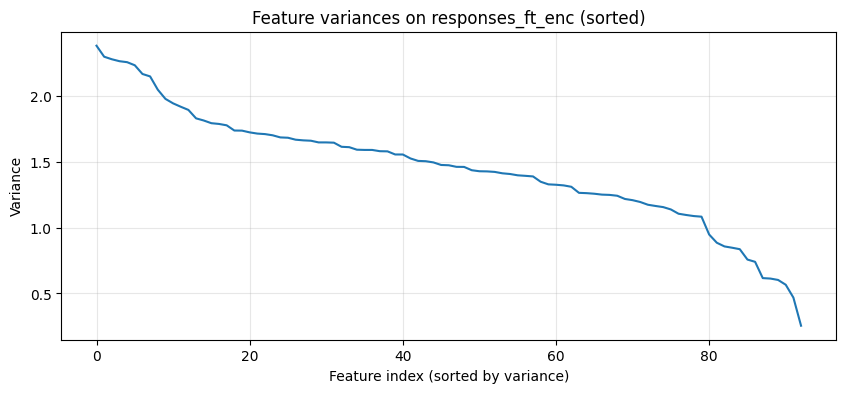

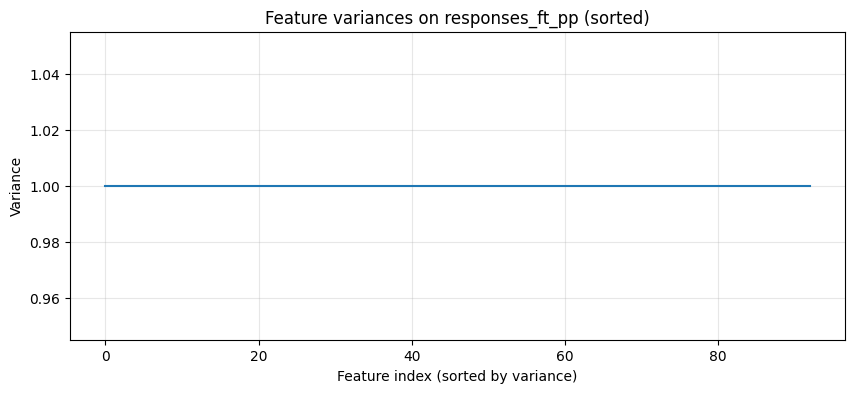

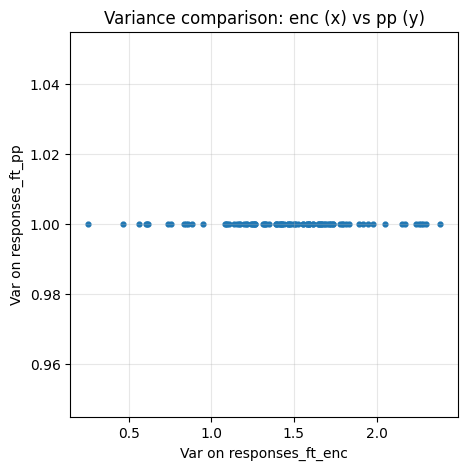

In [6]:
# [write the code here]

def plot_sorted_variances(var_series, title, ylabel="Variance"):
    v = var_series.sort_values(ascending=False).values
    plt.figure(figsize=(10,4))
    plt.plot(v)  # niente colori specificati
    plt.title(title)
    plt.xlabel("Feature index (sorted by variance)")
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.show()

# --- varianze (uso ddof=0 per coerenza con StandardScaler che usa var popolazione) ---
var_enc = responses_ft_enc.var(axis=0, ddof=0)
var_pp  = responses_ft_pp.var(axis=0, ddof=0)

print("Var enc: min/median/max =", float(var_enc.min()), float(var_enc.median()), float(var_enc.max()))
print("Var pp : min/median/max =", float(var_pp.min()),  float(var_pp.median()),  float(var_pp.max()))



plot_sorted_variances(var_enc, "Feature variances on responses_ft_enc (sorted)")
plot_sorted_variances(var_pp,  "Feature variances on responses_ft_pp (sorted)")

# (opzionale) confronto diretto: scatter enc vs pp
plt.figure(figsize=(5,5))
plt.scatter(var_enc.values, var_pp.values, s=12) # type: ignore
plt.title("Variance comparison: enc (x) vs pp (y)")
plt.xlabel("Var on responses_ft_enc")
plt.ylabel("Var on responses_ft_pp")
plt.grid(True, alpha=0.3)
plt.show()

#### Comment the results obtained for the variances (max 150 words):
In responses_ft_enc, the feature variances are clearly non-uniform: after sorting, the variance curve decreases smoothly from the most variable features (above ~2) down to much smaller values (below ~0.5). This indicates that different variables have very different spreads, so methods based on variance (e.g., PCA) would be influenced more by the high-variance features. In contrast, in responses_ft_pp the sorted variance curve is essentially flat at approximately 1 for all features. This is the expected effect of applying StandardScaler, which centers each feature and rescales it to have unit variance (up to numerical precision). As a consequence, the preprocessed dataset provides a balanced representation where all features contribute on a comparable scale, making subsequent PCA and clustering less dependent on the original magnitude of individual variables.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

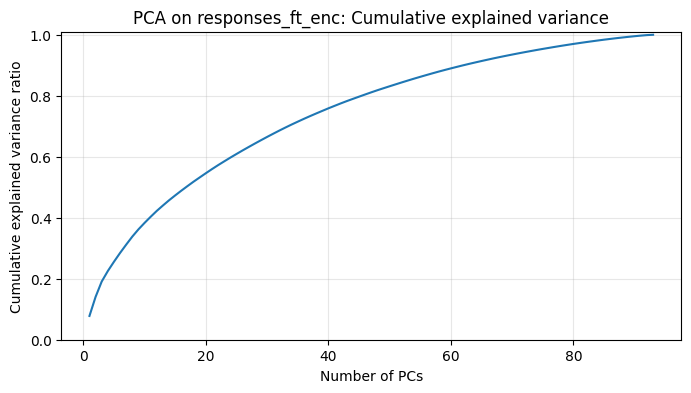

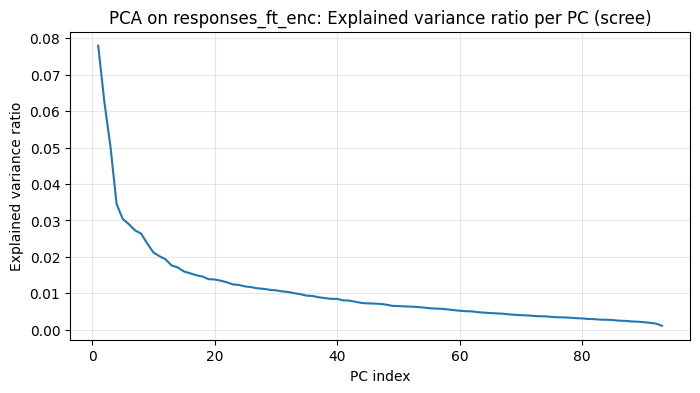

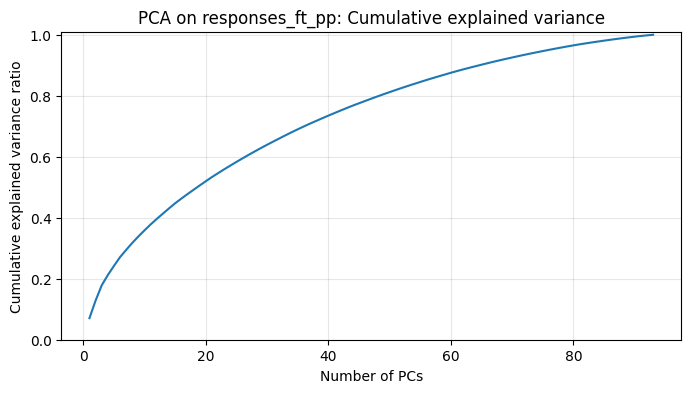

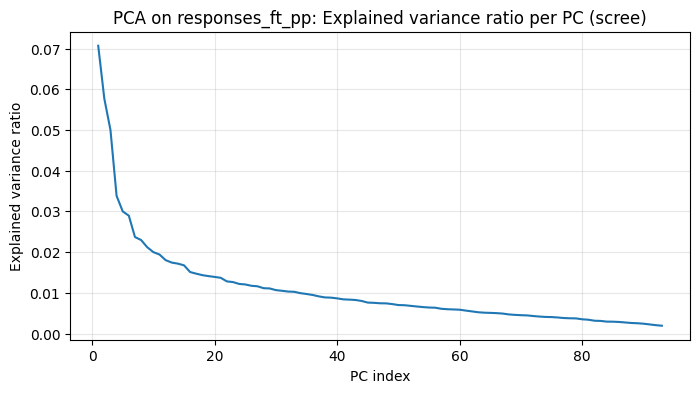

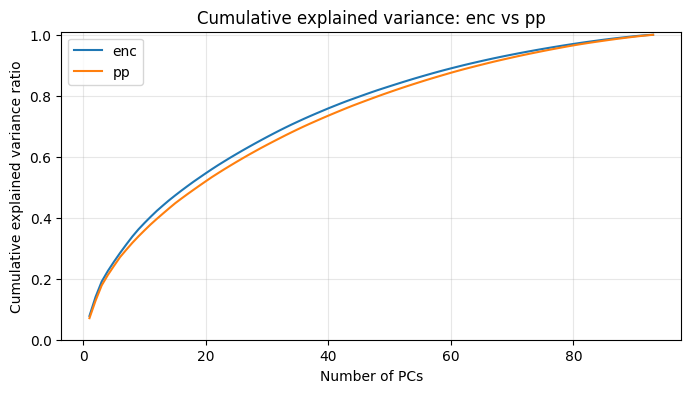

In [7]:
# [write the code here]
def fit_pca_and_plot_cumexp(df, title_prefix):
    X = df.values.astype(float)
    n_features = X.shape[1]

    # "all PCs": qui sono al massimo n_features (per te 93)
    pca = PCA(n_components=n_features, svd_solver="full")
    pca.fit(X)

    evr = pca.explained_variance_ratio_
    cum = np.cumsum(evr)

    # --- plot cumulative explained variance ---
    plt.figure(figsize=(8,4))
    plt.plot(np.arange(1, n_features+1), cum)
    plt.title(f"{title_prefix}: Cumulative explained variance")
    plt.xlabel("Number of PCs")
    plt.ylabel("Cumulative explained variance ratio")
    plt.ylim(0, 1.01)
    plt.grid(True, alpha=0.3)
    plt.show()

    # (opzionale) plot explained variance ratio per PC (scree)
    plt.figure(figsize=(8,4))
    plt.plot(np.arange(1, n_features+1), evr)
    plt.title(f"{title_prefix}: Explained variance ratio per PC (scree)")
    plt.xlabel("PC index")
    plt.ylabel("Explained variance ratio")
    plt.grid(True, alpha=0.3)
    plt.show()

    return pca, evr, cum

pca_enc, evr_enc, cum_enc = fit_pca_and_plot_cumexp(responses_ft_enc, "PCA on responses_ft_enc")
pca_pp,  evr_pp,  cum_pp  = fit_pca_and_plot_cumexp(responses_ft_pp,  "PCA on responses_ft_pp")

# confronto in un unico grafico (solo cumulative)
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, responses_ft_enc.shape[1]+1), cum_enc, label="enc")
plt.plot(np.arange(1, responses_ft_pp.shape[1]+1),  cum_pp,  label="pp")
plt.title("Cumulative explained variance: enc vs pp")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance ratio")
plt.ylim(0, 1.01)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

#### Comment the results obtained for the cumulative explained variances, knowing the values in the datasets and the fetures' variances (max 150 words):

In generale, la PCA su responses_ft_enc è più influenzata dalle feature con varianza maggiore (PCA “su covarianza”), mentre la PCA su responses_ft_pp è più vicina a una PCA “su correlazione”, perché lo scaling rende le feature confrontabili. Nel nostro caso, la similarità delle curve suggerisce che la struttura principale dipende più dalle correlazioni tra risposte che da differenze di scala. 
Infine, l’andamento della cumulativa (crescita non troppo rapida) indica che la varianza è distribuita su molte direzioni: per preservare percentuali elevate di varianza servirebbe un numero non piccolo di PC

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

m' (>=33% variance) = 9
m = min(m', 5) = 5
Explained variance preserved by first m PCs: 24.21%


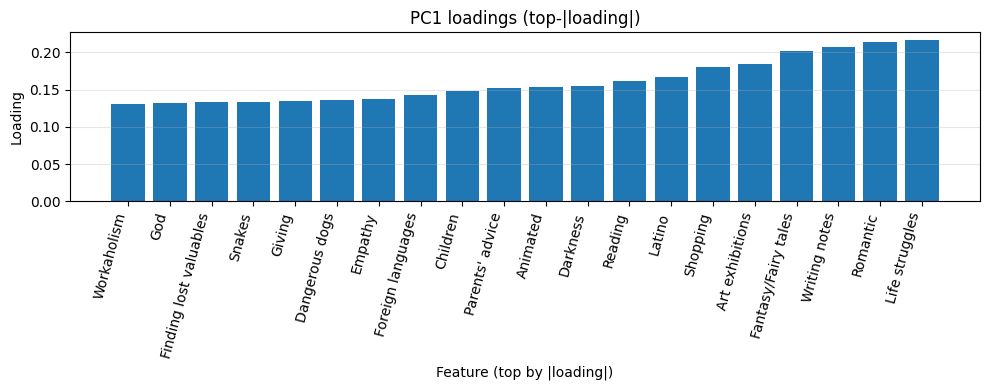

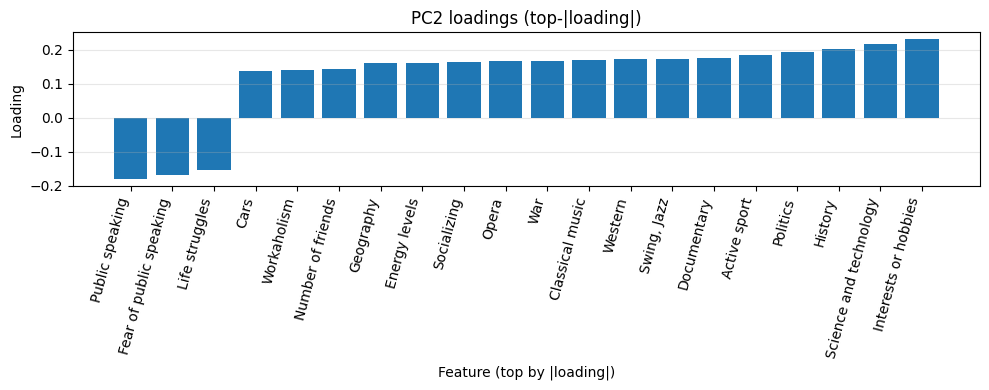

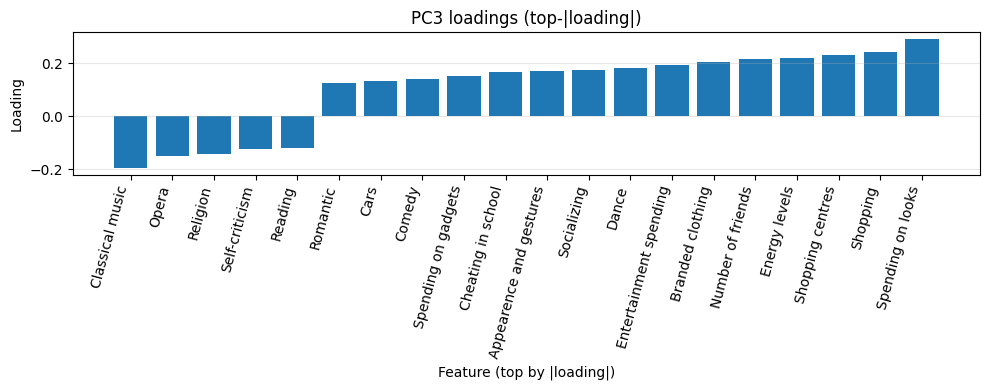

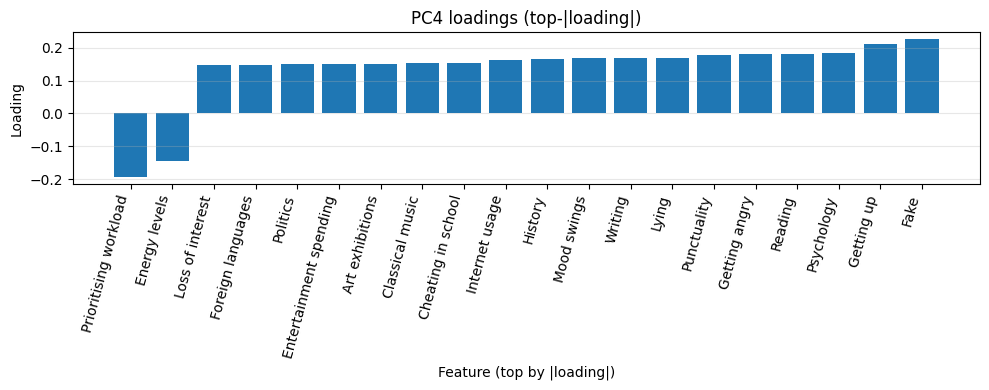

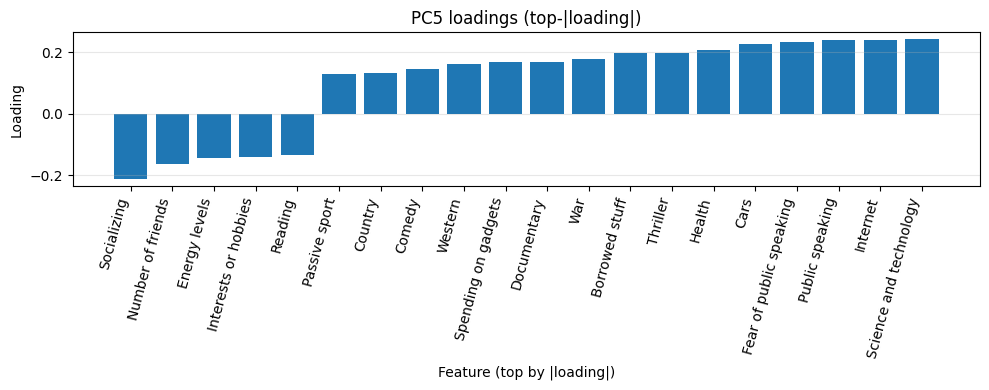

In [8]:
# [write the code here]

X = responses_ft_pp.values.astype(float)
feature_names = responses_ft_pp.columns.to_list()
d = X.shape[1]

# PCA "full" per calcolare m' (quanti PC servono per 33% varianza)
pca_full = PCA(n_components=d, svd_solver="full", random_state=0)
pca_full.fit(X)

evr_full = pca_full.explained_variance_ratio_
cum_full = np.cumsum(evr_full)

target = 0.33
m_prime = int(np.searchsorted(cum_full, target) + 1)  # +1 perché index 0 -> 1 PC
m = min(m_prime, 5)


print(f"m' (>=33% variance) = {m_prime}")
print(f"m = min(m', 5) = {m}")
print(f"Explained variance preserved by first m PCs: {cum_full[m-1]*100:.2f}%")

pca = PCA(n_components=m, svd_solver="full", random_state=0)
pca.fit(X)

evr = pca.explained_variance_ratio_
preserved_pct = evr.sum() * 100

def plot_pc_loadings(pc_vec, feature_names, pc_title, top_k=20):
    s = pd.Series(pc_vec, index=feature_names)
    s = s.reindex(s.abs().sort_values(ascending=False).head(top_k).index)  # top-k per |loading|
    s = s.sort_values()  # ordinamento per un plot più leggibile

    plt.figure(figsize=(10,4))
    plt.bar(s.index, s.values) # type: ignore
    plt.title(pc_title)
    plt.xlabel("Feature (top by |loading|)")
    plt.ylabel("Loading")
    plt.xticks(rotation=75, ha="right")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

components = pca.components_  # shape (m, d) -> ogni riga è un PC (direzione)

for i in range(m):
    plot_pc_loadings(components[i], feature_names, f"PC{i+1} loadings (top-|loading|)")


#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

PC1 (“Imagination & sensitivity”) loads on Romantic, Fantasy/Fairy tales, Writing notes, Art exhibitions, Reading, Latino, and prosocial traits (Empathy, Giving), suggesting an emotional/creative–cultural dimension.

PC2 (“Social confidence vs public-speaking anxiety”) contrasts Socializing, Number of friends, Energy levels (plus interests such as History/Politics/Science and Active sport) with Public speaking and Fear of public speaking. 

PC3 (“Social–consumer lifestyle vs traditional/introspective tastes”) is driven by Shopping/Spending-on-looks/Branded clothing/Entertainment and Dance versus Classical music, Opera, Religion, Self-criticism, Reading. 

PC4 (“Volatility vs conscientiousness”) links Fake/Lying/Getting angry/Mood swings/Cheating to low Prioritising workload/Energy. 

PC5 (“Tech/media focus vs social vitality”) emphasizes Internet/Science/Cars/Thriller–War genres against Socializing/Energy.

#### Write the code for visualizing the score graph (with PC names on the axis):

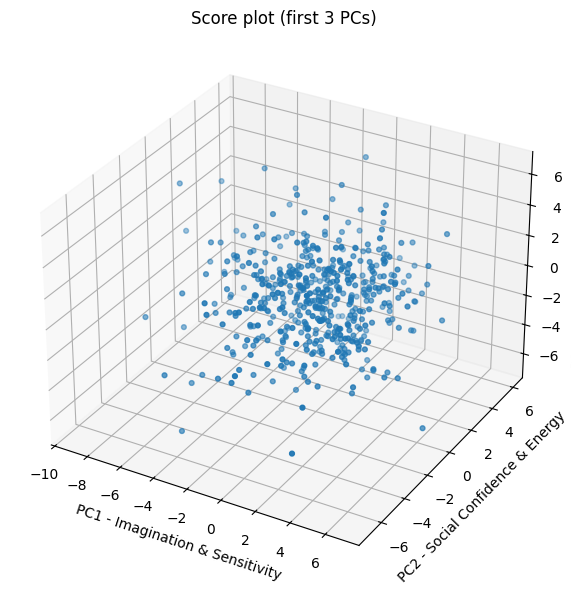

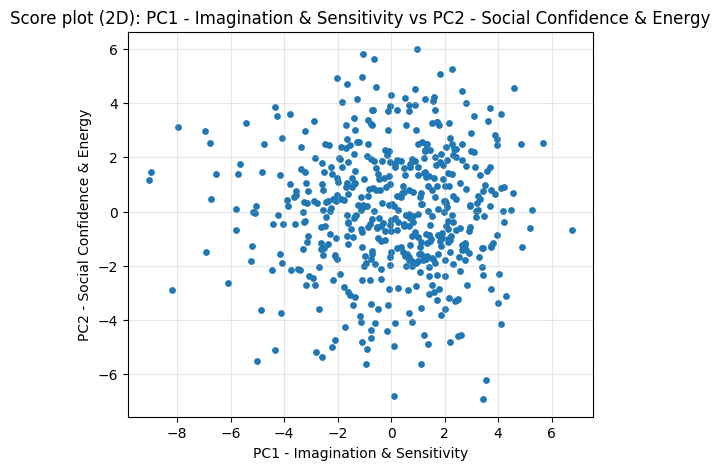

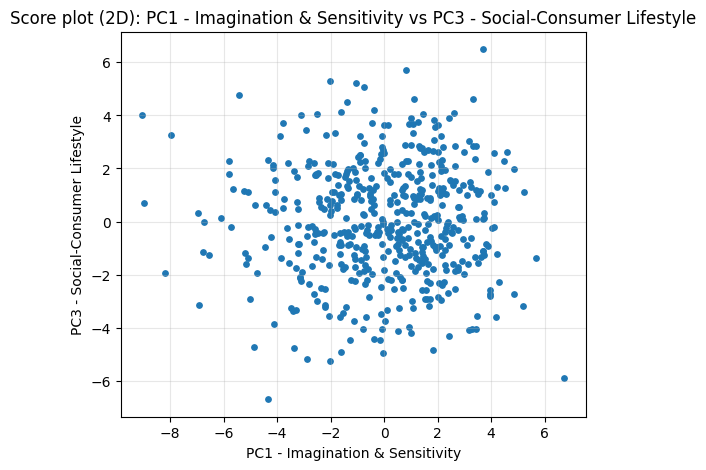

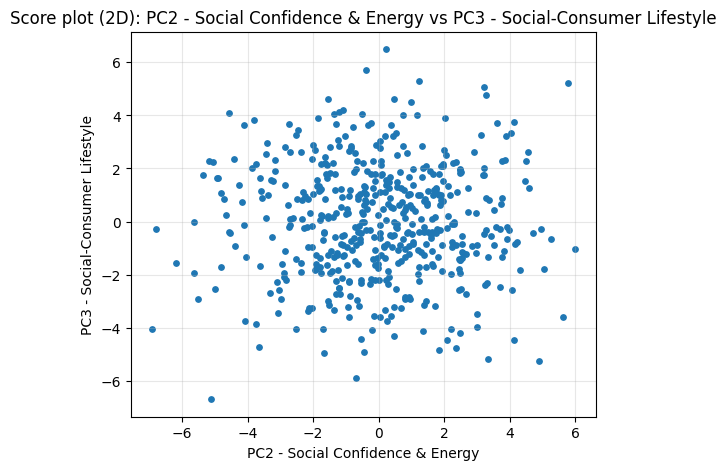

'\n# Barplot explained variance (%) per PC\nplt.figure(figsize=(7,4))\nplt.bar(np.arange(1, m+1), evr*100)\nplt.title("Explained variance (%) per PC (PCA on responses_ft_pp)")\nplt.xlabel("Principal Component")\nplt.ylabel("Explained variance (%)")\nplt.xticks(np.arange(1, m+1))\nplt.grid(True, axis="y", alpha=0.3)\nplt.show()\n\nprint(f"Preserved explained variance by m={m} PCs: {preserved_pct:.2f}%")\n\n\ndef top_features_for_pc(pc_vec, feature_names, top_k=8):\n    s = pd.Series(pc_vec, index=feature_names)\n    top_pos = s.sort_values(ascending=False).head(top_k)\n    top_neg = s.sort_values(ascending=True).head(top_k)\n    return top_pos, top_neg\n\nfor i in range(m):\n    top_pos, top_neg = top_features_for_pc(components[i], feature_names, top_k=8)\n    print(f"\n===== PC{i+1} =====")\n    print("Top positive loadings:")\n    display(top_pos.to_frame("loading"))\n    print("Top negative loadings:")\n    display(top_neg.to_frame("loading"))\n\n\n\nresponses_ft_pca = pd.DataFrame(s

In [9]:

pc_names = [
    "PC1 - Imagination & Sensitivity",
    "PC2 - Social Confidence & Energy",
    "PC3 - Social-Consumer Lifestyle",
    "PC4 - Volatility vs Conscientiousness",
    "PC5 - Tech/Media Focus vs Social Vitality",
]

scores = pca.transform(X)  # shape (n_samples, m)
responses_ft_pca = pd.DataFrame(scores, index=responses_ft_pp.index, columns=pc_names)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(responses_ft_pca.iloc[:,0], responses_ft_pca.iloc[:,1], responses_ft_pca.iloc[:,2], s=12)

ax.set_title("Score plot (first 3 PCs)")
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2]) # type: ignore
plt.tight_layout()
plt.show()

# 2D support score plots: (PC1,PC2), (PC1,PC3), (PC2,PC3)

pairs = [(0, 1), (0, 2), (1, 2)]

for a, b in pairs:
    plt.figure(figsize=(6, 5))
    plt.scatter(responses_ft_pca.iloc[:, a], responses_ft_pca.iloc[:, b], s=15)
    plt.title(f"Score plot (2D): {pc_names[a]} vs {pc_names[b]}")
    plt.xlabel(pc_names[a])
    plt.ylabel(pc_names[b])
    plt.grid(True, alpha=0.3)
    plt.show()


"""
# Barplot explained variance (%) per PC
plt.figure(figsize=(7,4))
plt.bar(np.arange(1, m+1), evr*100)
plt.title("Explained variance (%) per PC (PCA on responses_ft_pp)")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance (%)")
plt.xticks(np.arange(1, m+1))
plt.grid(True, axis="y", alpha=0.3)
plt.show()

print(f"Preserved explained variance by m={m} PCs: {preserved_pct:.2f}%")


def top_features_for_pc(pc_vec, feature_names, top_k=8):
    s = pd.Series(pc_vec, index=feature_names)
    top_pos = s.sort_values(ascending=False).head(top_k)
    top_neg = s.sort_values(ascending=True).head(top_k)
    return top_pos, top_neg

for i in range(m):
    top_pos, top_neg = top_features_for_pc(components[i], feature_names, top_k=8)
    print(f"\n===== PC{i+1} =====")
    print("Top positive loadings:")
    display(top_pos.to_frame("loading"))
    print("Top negative loadings:")
    display(top_neg.to_frame("loading"))



responses_ft_pca = pd.DataFrame(scores, index=responses_ft_pp.index, columns=pc_names)

print("responses_ft_pca shape:", responses_ft_pca.shape)
display(responses_ft_pca.head())
"""



## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

Silhouette scores:
k=3: 0.1690
k=4: 0.1668
k=5: 0.1541
k=6: 0.1596
k=7: 0.1590
k=8: 0.1581
k=9: 0.1515
k=10: 0.1535

Best k = 3 with silhouette = 0.1690


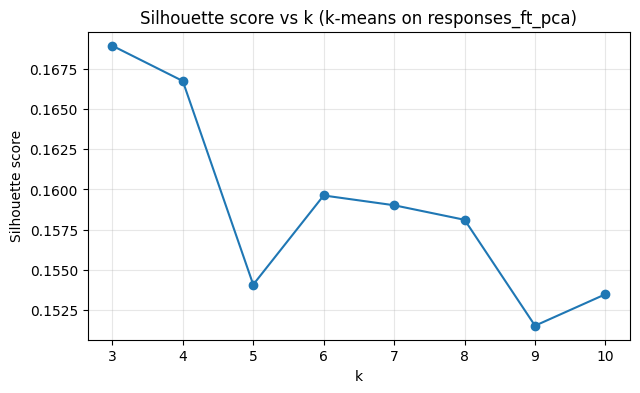

Cluster sizes:
0    172
1    183
2    151
Name: count, dtype: int64


PC1 - Imagination & Sensitivity  PC2 - Social Confidence & Energy  \
Cluster 0                         1.372173                          1.966067   
Cluster 1                         1.203949                         -1.978858   
Cluster 2                        -3.022096                          0.158725   

           PC3 - Social-Consumer Lifestyle  \
Cluster 0                        -0.572988   
Cluster 1                         0.543015   
Cluster 2                        -0.005416   

           PC4 - Volatility vs Conscientiousness  \
Cluster 0                              -0.139076   
Cluster 1                               0.154034   
Cluster 2                              -0.028260   

           PC5 - Tech/Media Focus vs Social Vitality  
Cluster 0                                  -0.239902  
Cluster 1                                   0.156388  
Cluster 2                                   0.083736

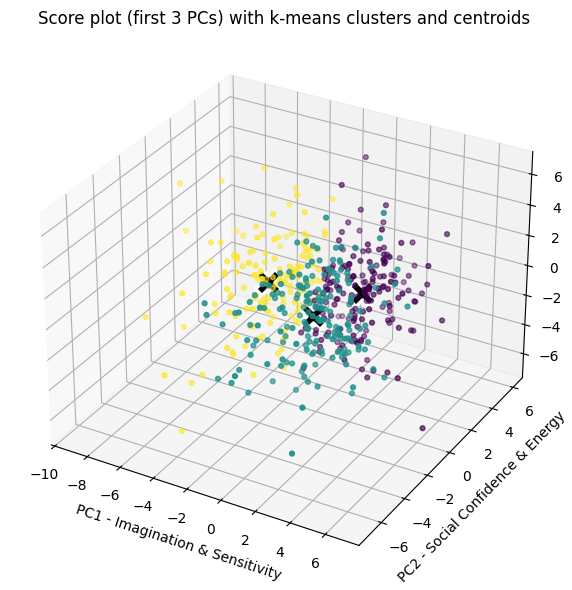

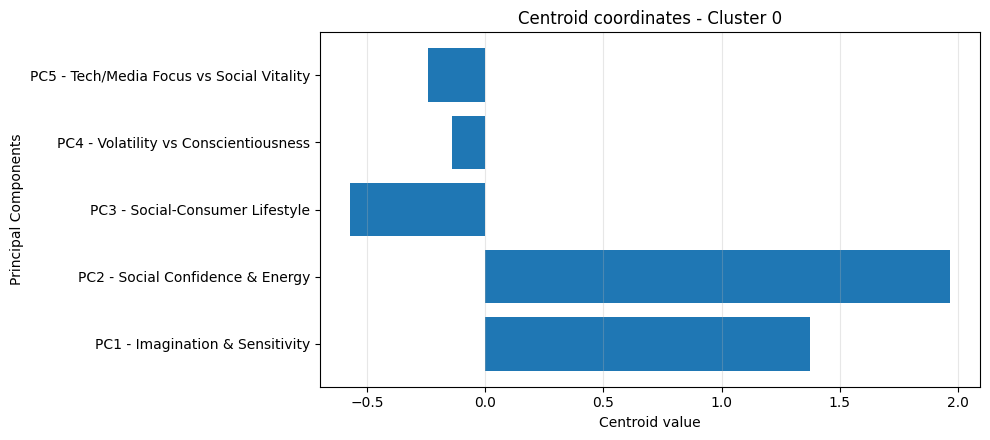

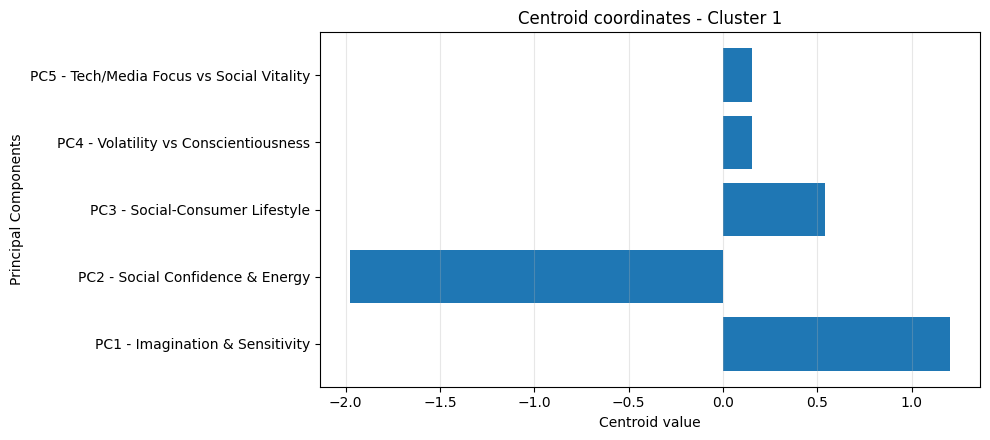

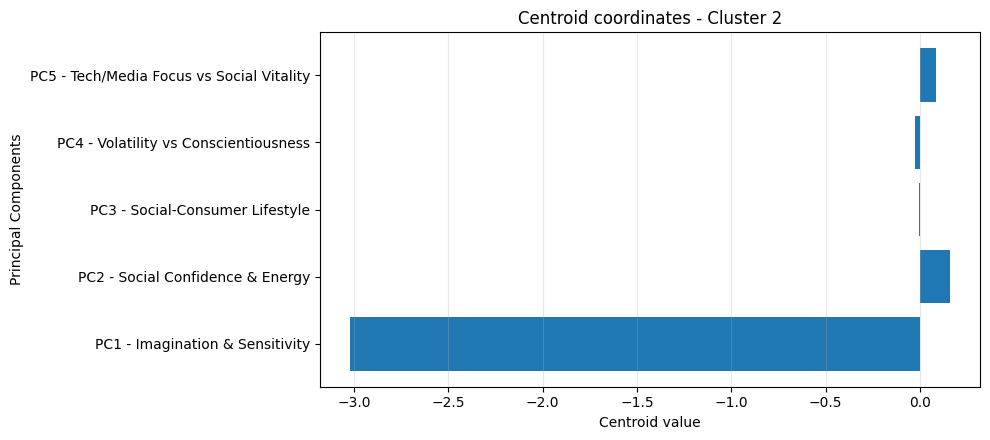

In [10]:
# [write the code here]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X = responses_ft_pca.values.astype(float)
m = X.shape[1]

ks = list(range(3, 11))
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels_k = km.fit_predict(X)
    score = silhouette_score(X, labels_k)
    sil_scores.append(score)

best_idx = int(np.argmax(sil_scores))
best_k = ks[best_idx]
best_score = sil_scores[best_idx]

print("Silhouette scores:")
for k, s in zip(ks, sil_scores):
    print(f"k={k}: {s:.4f}")

print(f"\nBest k = {best_k} with silhouette = {best_score:.4f}")

plt.figure(figsize=(7,4))
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette score vs k (k-means on responses_ft_pca)")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.xticks(ks)
plt.grid(True, alpha=0.3)
plt.show()

# === Fit finale con il best k (serve per Exercise 5 e 6) ===
kmeans = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
cluster_labels = kmeans.fit_predict(X)   # <-- variabile fondamentale
centroids = kmeans.cluster_centers_

print("Cluster sizes:")
print(pd.Series(cluster_labels).value_counts().sort_index())

# (opzionale ma utile) tabella centroidi
centroids_df = pd.DataFrame(centroids, columns=pc_names)
centroids_df.index = [f"Cluster {i}" for i in range(best_k)]
display(centroids_df)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(responses_ft_pca.iloc[:,0], responses_ft_pca.iloc[:,1], responses_ft_pca.iloc[:,2],
            c=cluster_labels, s=12)

ax.scatter(
    centroids[:,0], centroids[:,1], centroids[:,2],
    s=350, marker="X",
    c="black", alpha=1.0,
    edgecolors="white", linewidths=2.5,
    depthshade=False
)

ax.set_title("Score plot (first 3 PCs) with k-means clusters and centroids")
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
plt.tight_layout()
plt.show()

centroids_df = pd.DataFrame(centroids, columns=pc_names)
centroids_df.index = [f"Cluster {i}" for i in range(best_k)]

for i in range(best_k):
    c = centroids_df.iloc[i]

    plt.figure(figsize=(10, 4.5))  # più larga che alta
    # barplot ORIZZONTALE, nomi sono troppo lunghi e in verticale il plot verrebbe troppo schiacciato
    plt.barh(c.index, c.values)
    plt.title(f"Centroid coordinates - Cluster {i}")
    plt.xlabel("Centroid value")
    plt.ylabel("Principal Components")
    plt.grid(True, axis="x", alpha=0.3)

    plt.tight_layout()
    plt.show()





#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

Cluster 0 — “Outgoing Imaginative”

Cluster 0 shows strong positive scores on PC2 (Social Confidence & Energy) and clear positive scores on PC1 (Imagination & Sensitivity), describing socially confident, energetic individuals with a creative/emotionally oriented profile. The centroid is moderately negative on PC3 (Social-Consumer Lifestyle), suggesting a lower inclination toward consumerism and appearance-driven habits. Slightly negative values on PC4 (Volatility vs Conscientiousness) and PC5 (Tech/Media Focus vs Social Vitality) indicate a mild tendency toward stability/conscientiousness and relatively higher social vitality compared with tech/media focus.

Cluster 1 — “Sensitive but Socially Anxious Trend-Oriented”

Cluster 1 is positive on PC1 (Imagination & Sensitivity) but strongly negative on PC2 (Social Confidence & Energy), indicating imaginative and sensitive individuals with lower social confidence and/or stronger public-speaking anxiety. The centroid is positive on PC3 (Social-Consumer Lifestyle), consistent with higher orientation toward shopping, entertainment, and appearance-related preferences. Small positive scores on PC4 and PC5 suggest a slight shift toward behavioural volatility (vs conscientiousness) and a modest tilt toward tech/media focus relative to social vitality.

Cluster 2 — “Pragmatic Low-Imagination”

Cluster 2 is characterized by a strongly negative score on PC1 (Imagination & Sensitivity), marking the opposite pole of the creative/romantic/cultural dimension. The remaining centroid coordinates are close to zero, with PC2 slightly positive and PC3–PC4 essentially neutral, indicating no strong social-confidence, consumer-lifestyle, or volatility/conscientiousness signature. PC5 is only mildly positive, suggesting at most a weak tendency toward tech/media focus. Overall, the cluster is primarily defined by low imagination/sensitivity.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

cluster       PC1       PC2       PC3  Age  Gender         Education  \
666        1 -0.444523 -0.227614  3.703566   16  female    primary school   
93         0  1.527577  0.804204 -2.907293   23  female    masters degree   
442        0 -0.862977  3.380562  0.806529   23    male  secondary school   
495        2 -2.611504 -1.379916  2.222729   19    male  secondary school   
327        1  3.996377 -3.389001  1.003293   19  female  secondary school   

    Only child Home Town Type  
666         no           city  
93         yes           city  
442        yes        village  
495        yes        village  
327         no        village

Clusters sizes:
 cluster
0    172
1    183
2    151
Name: count, dtype: int64


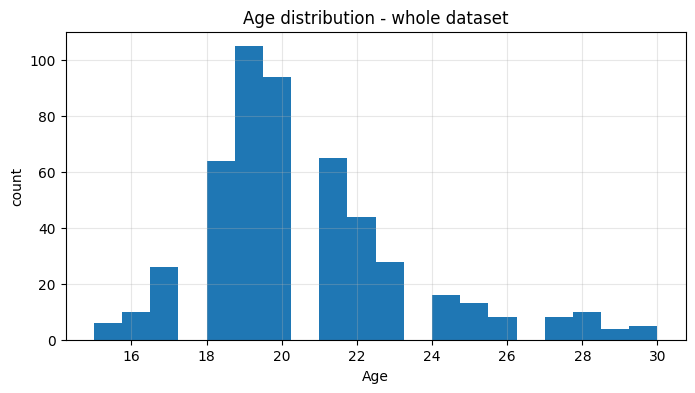

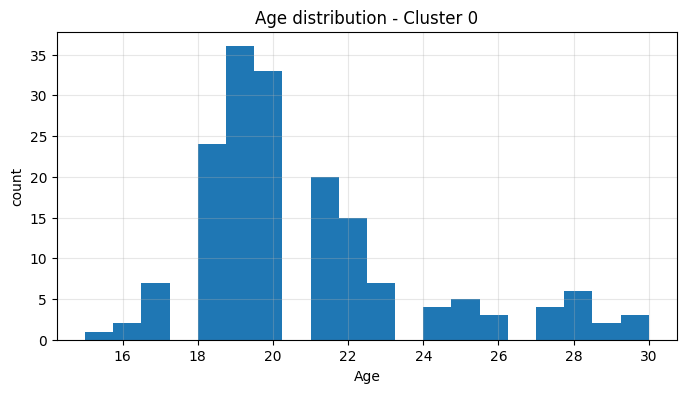

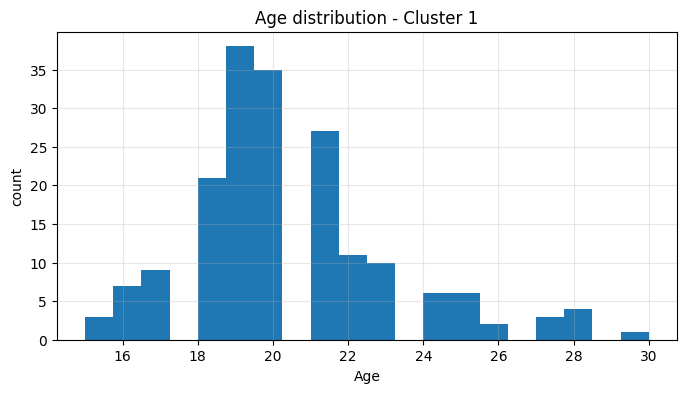

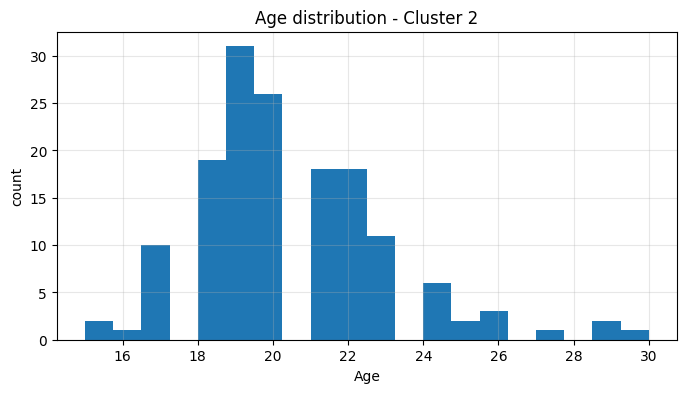

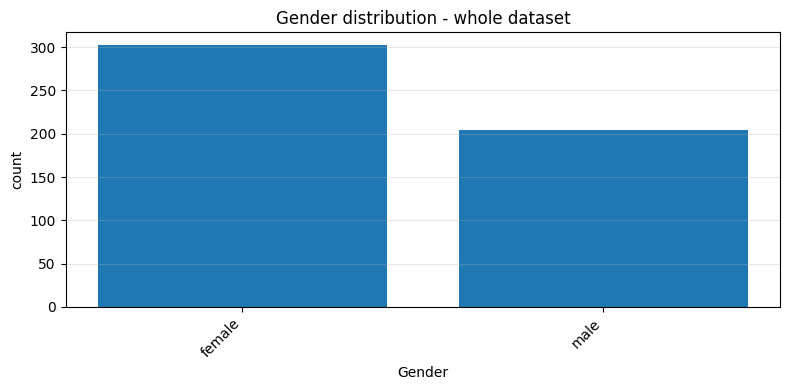

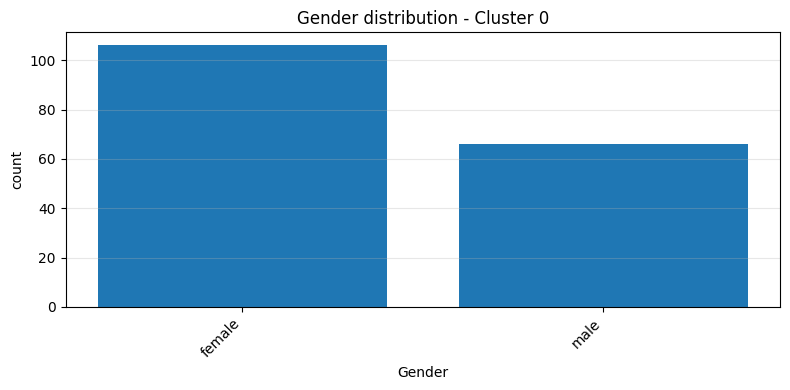

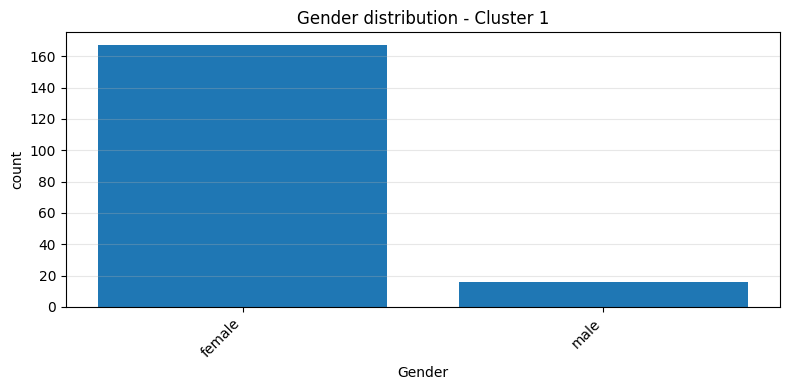

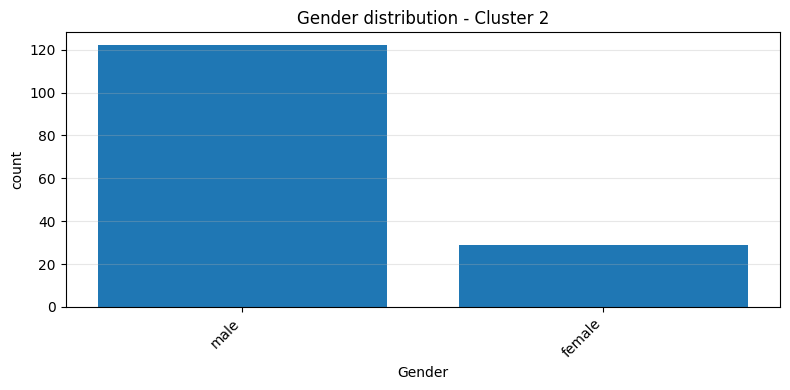

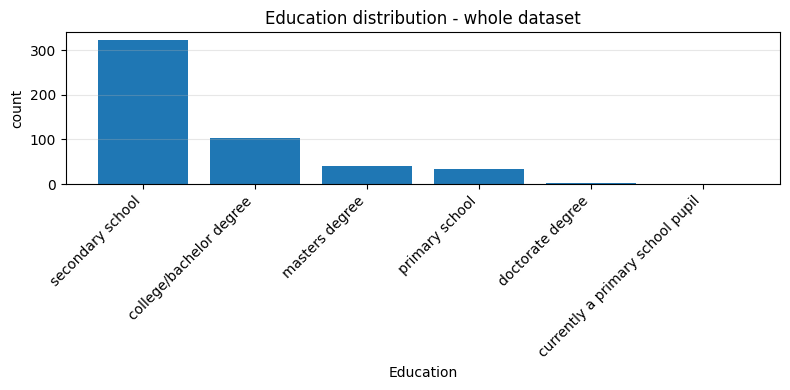

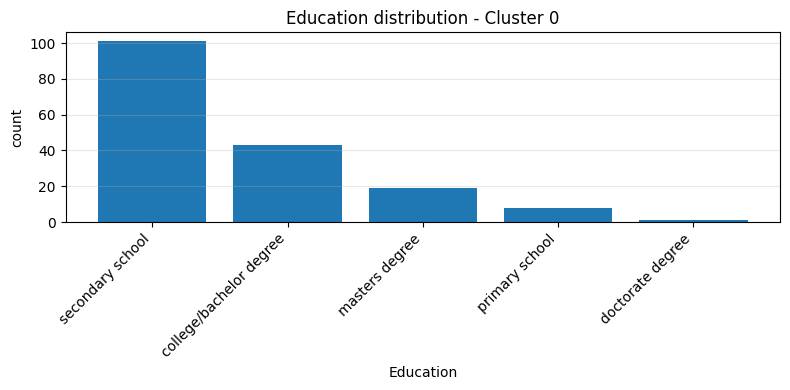

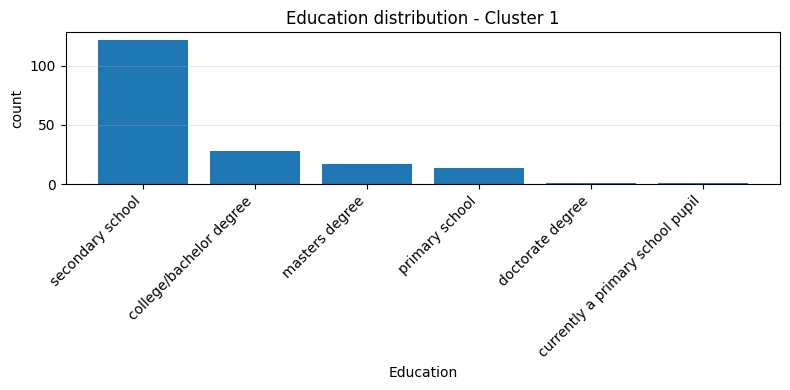

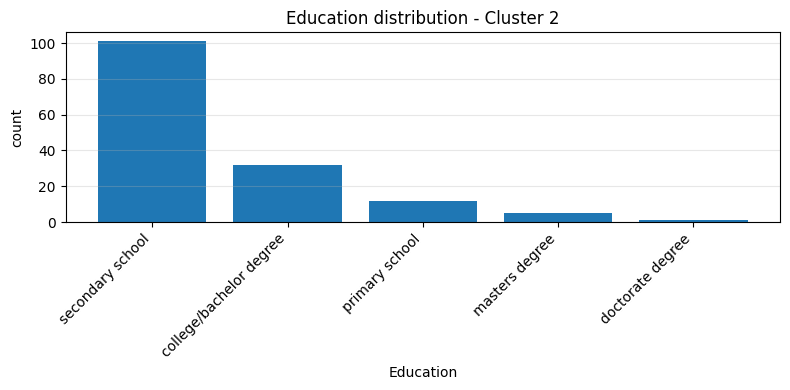

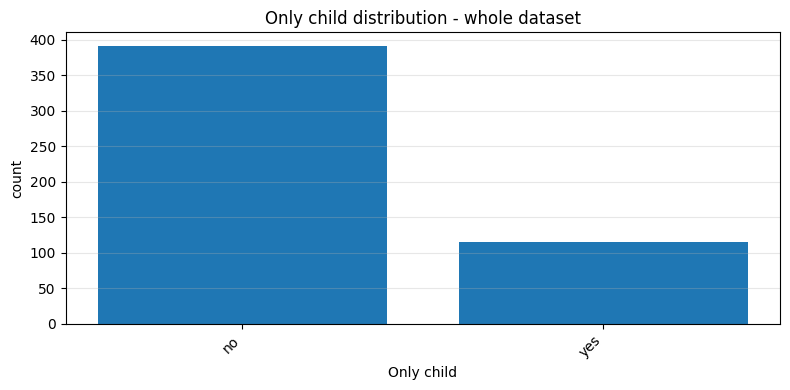

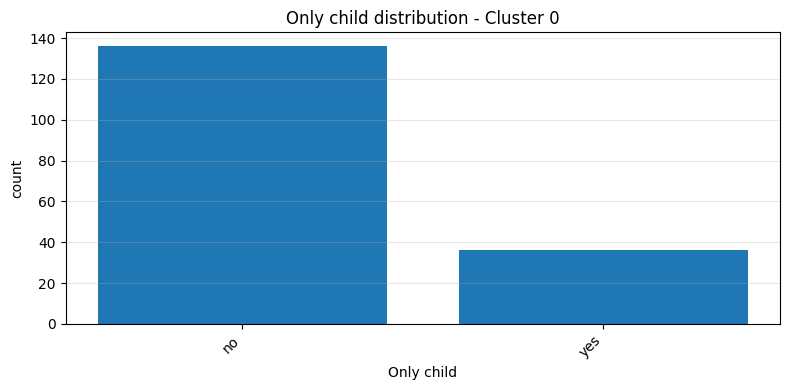

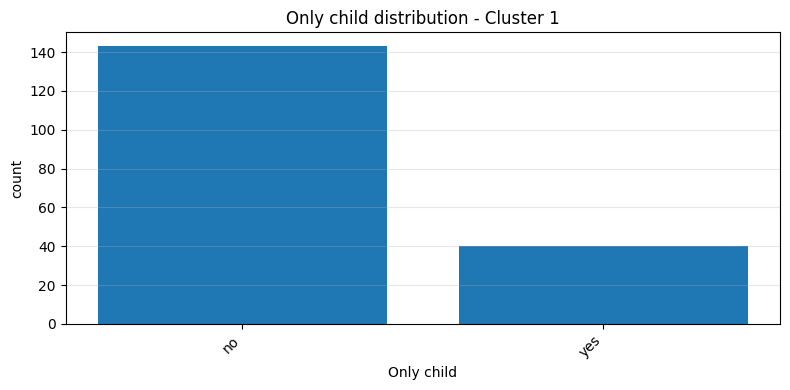

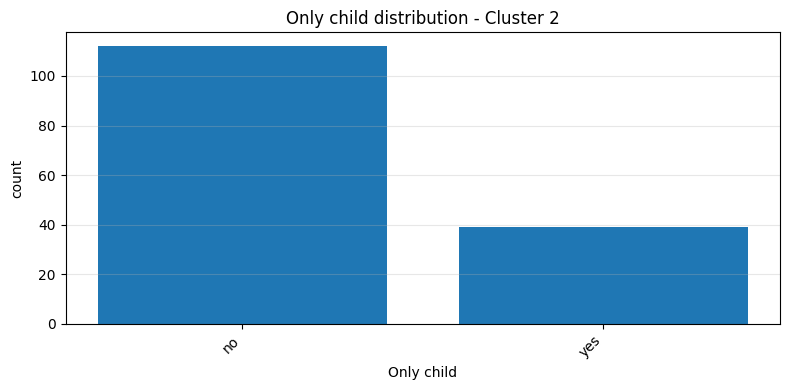

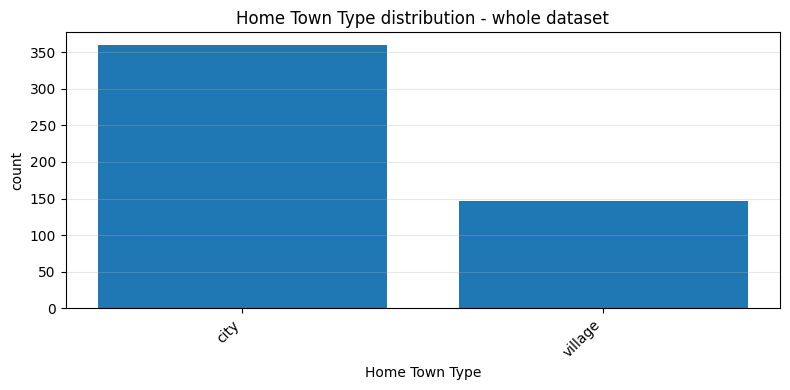

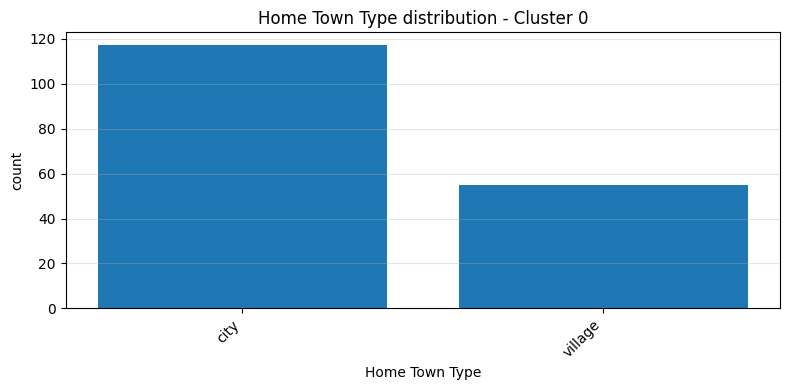

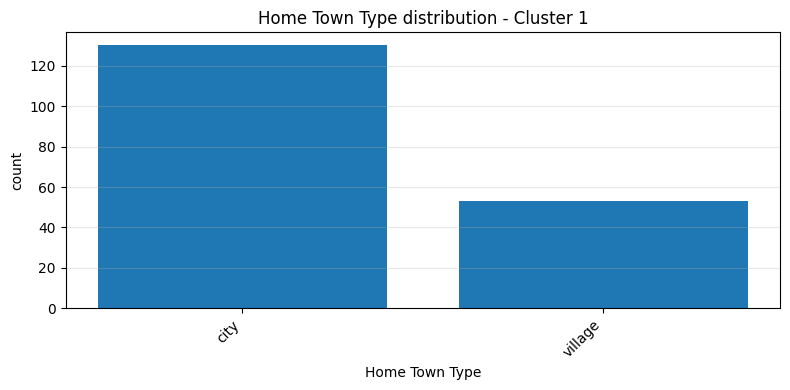

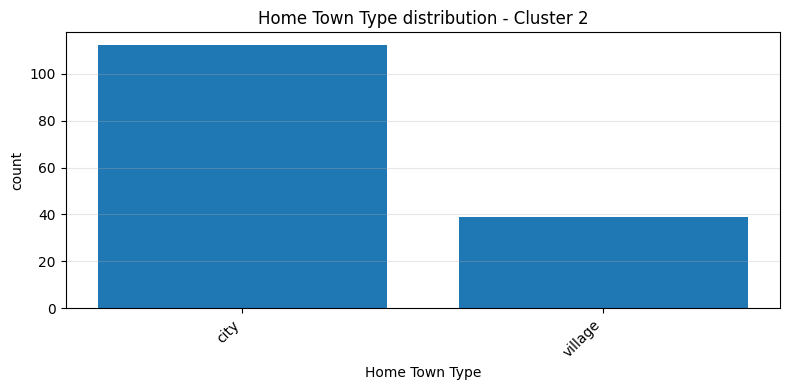

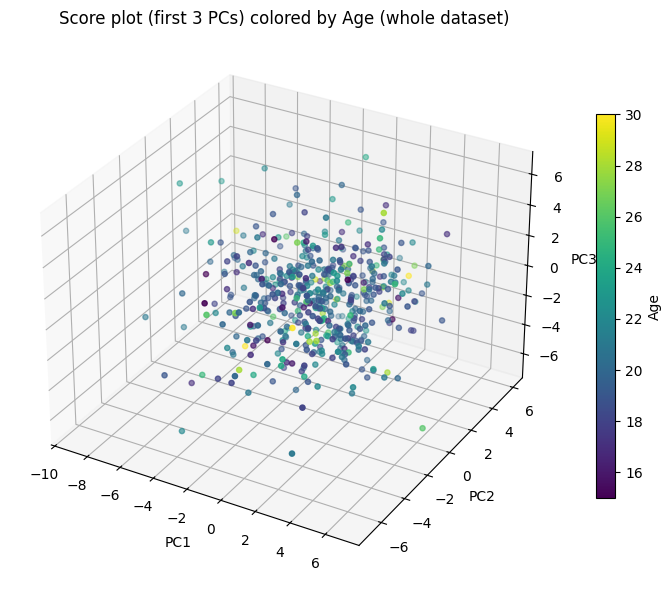

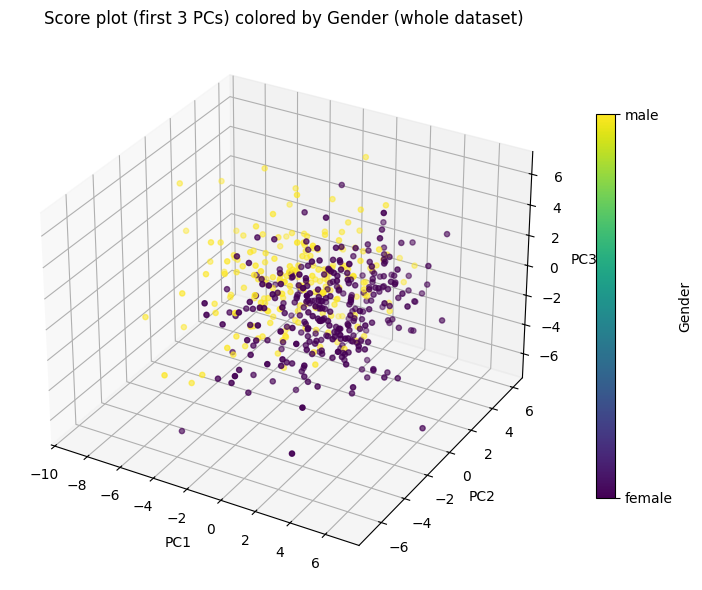

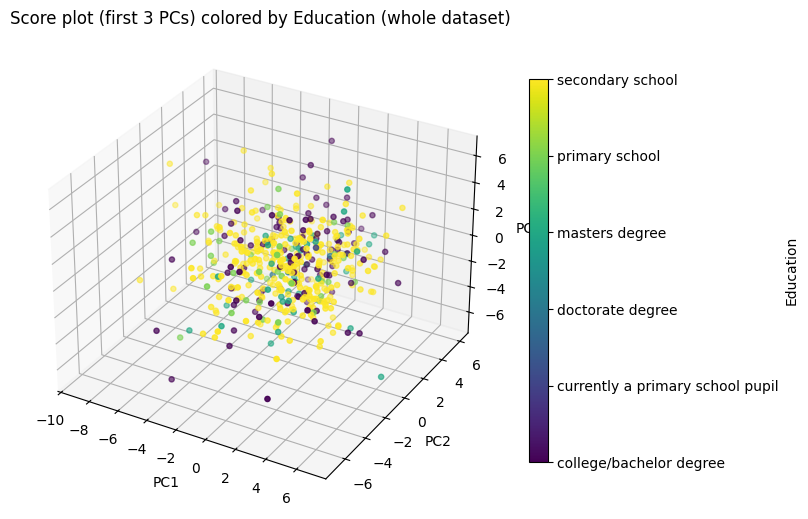

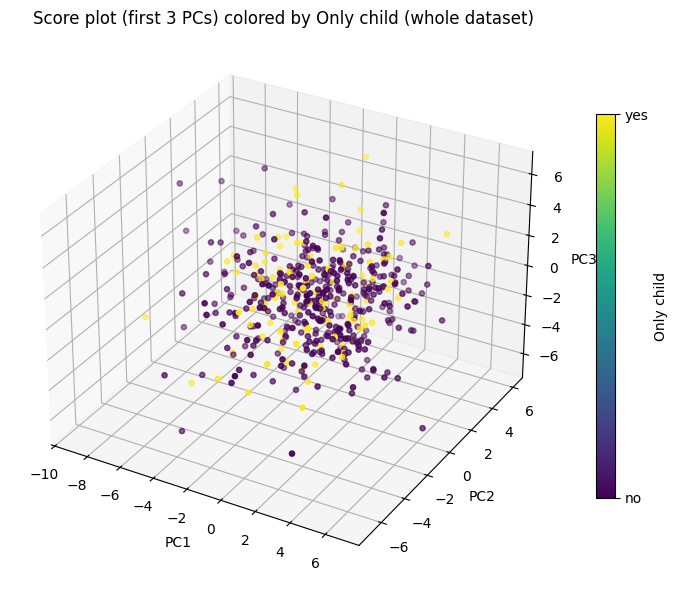

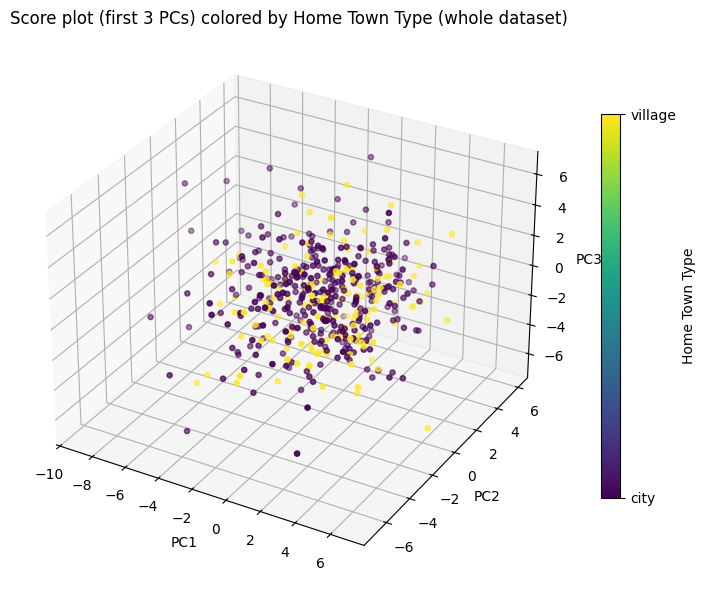

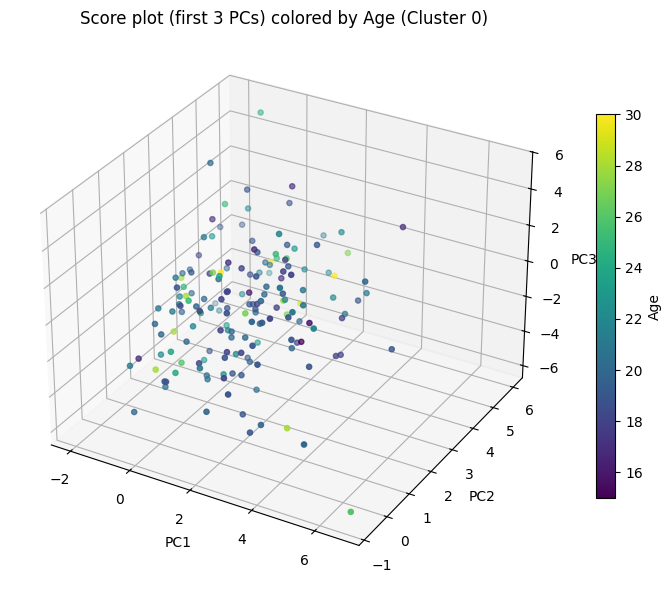

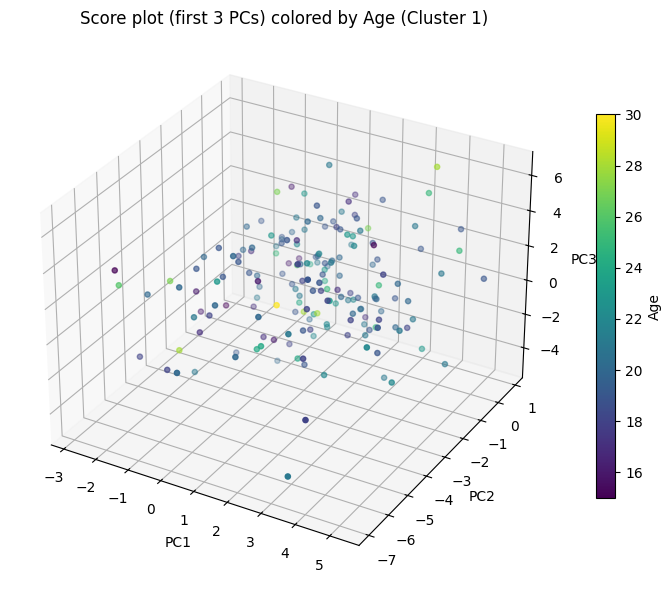

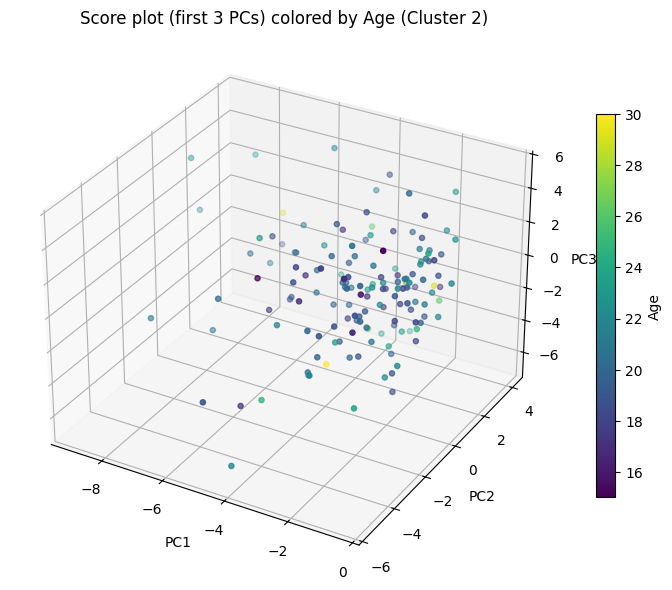

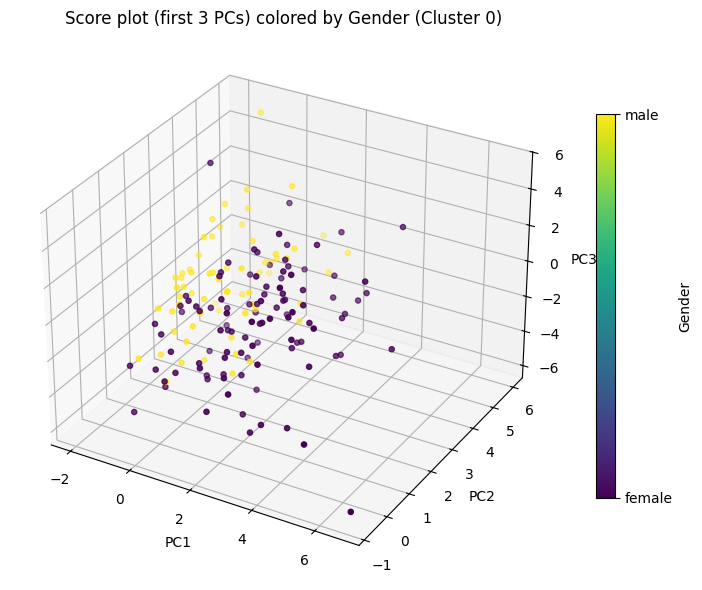

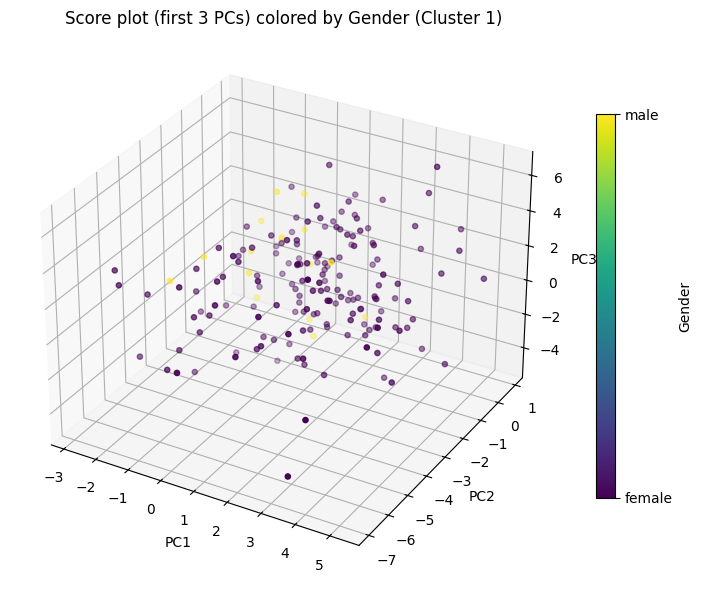

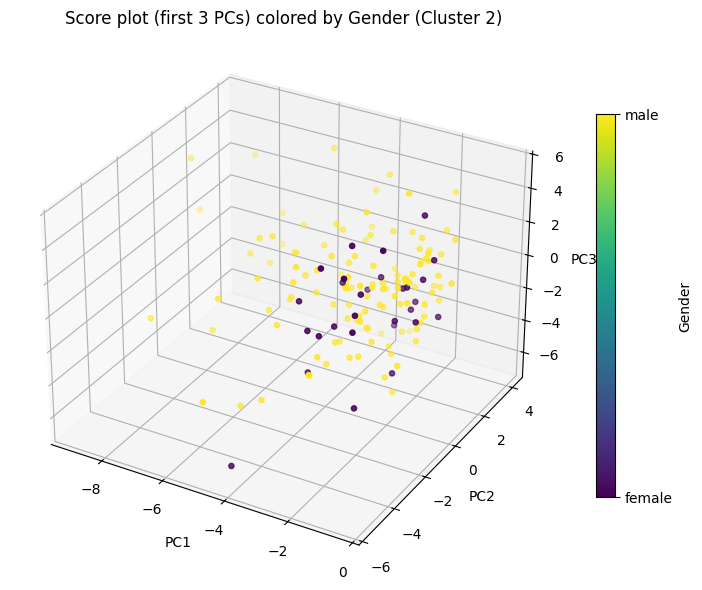

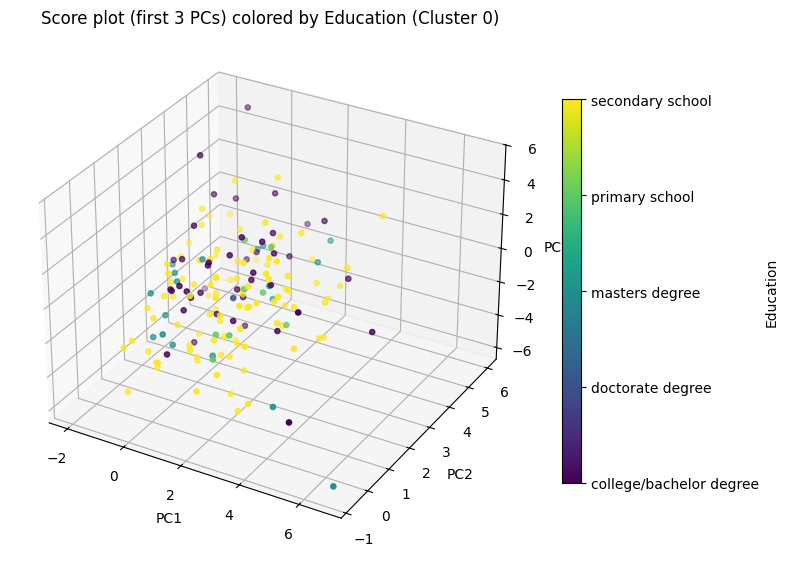

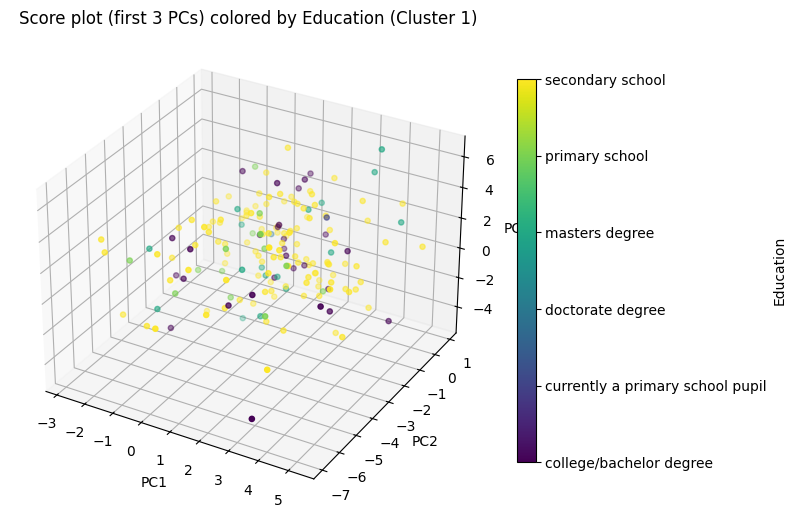

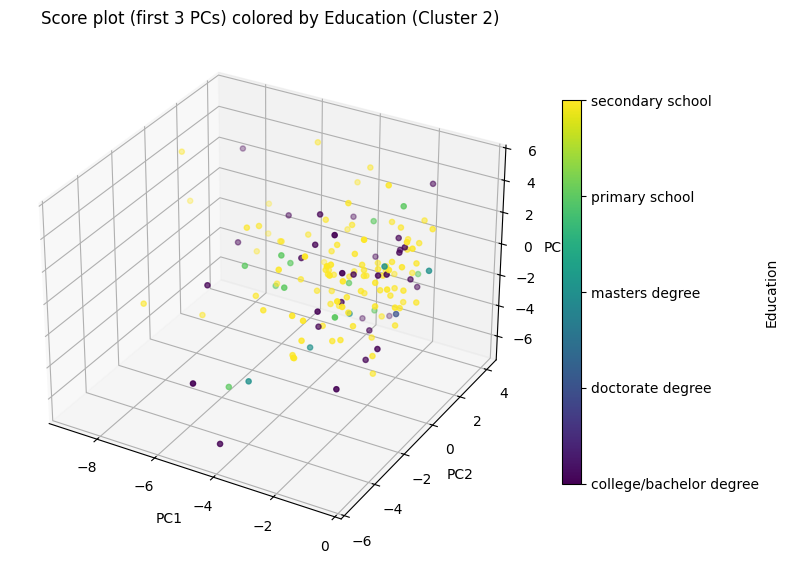

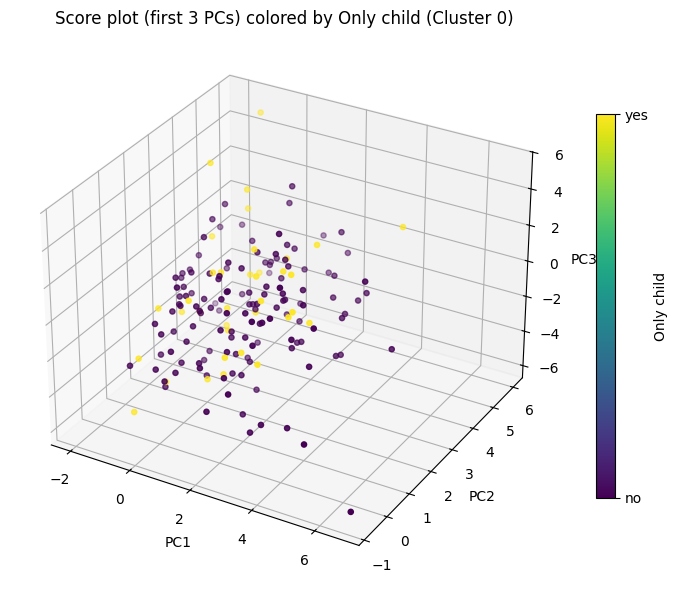

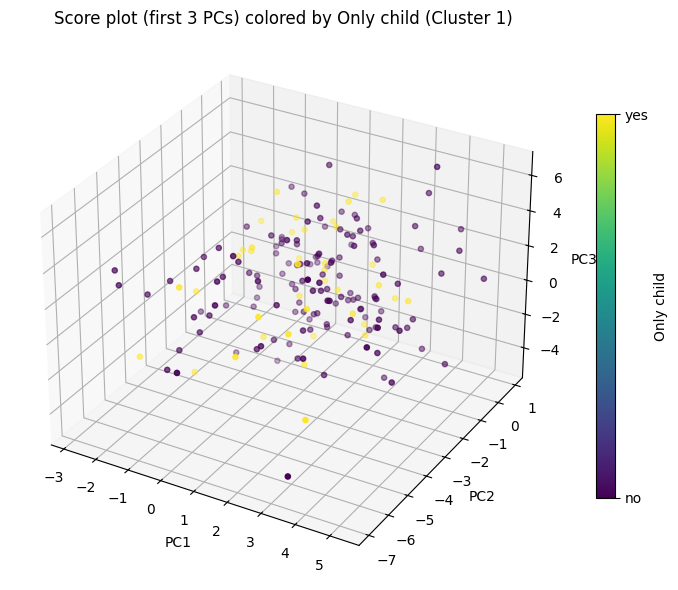

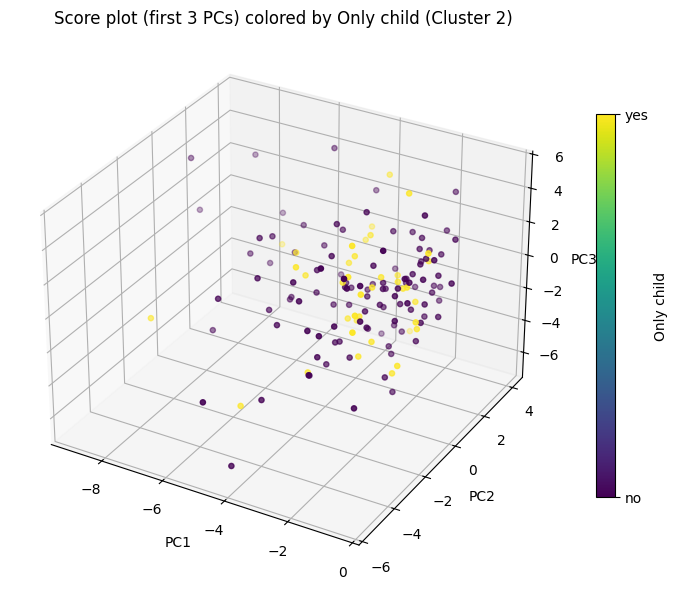

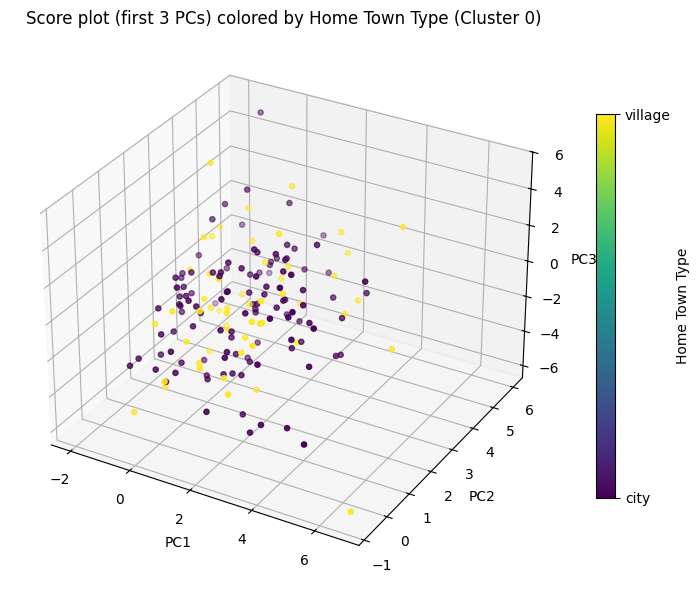

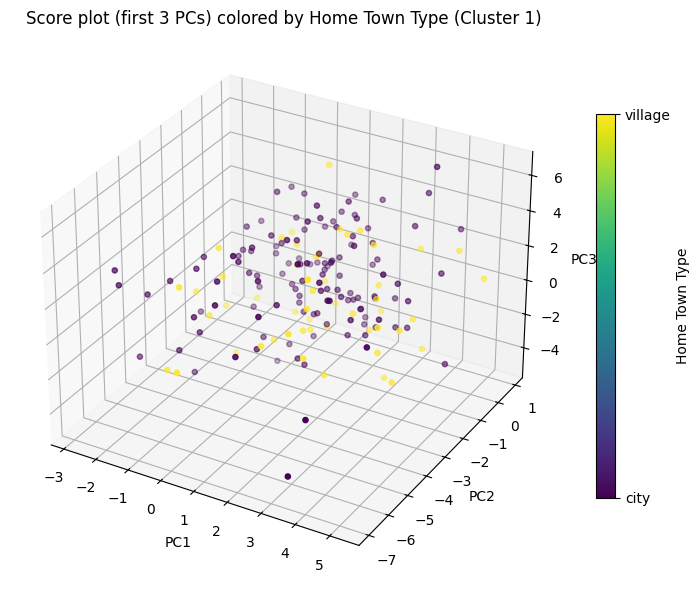

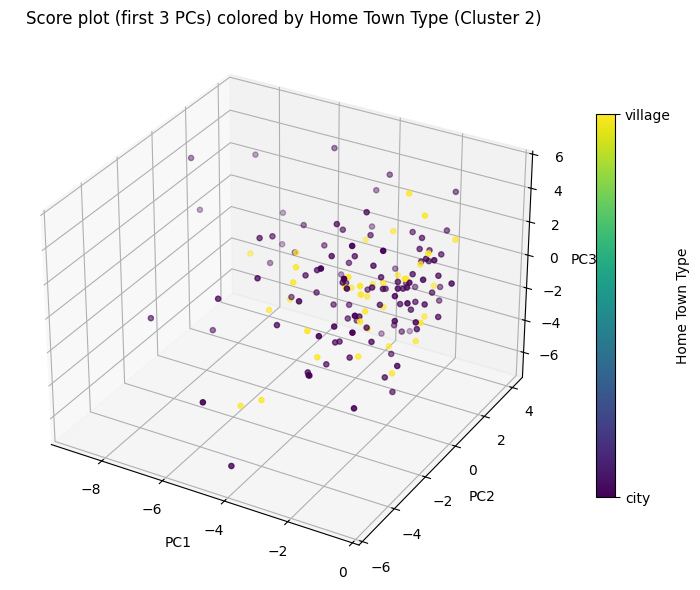

In [11]:
# [write the code here]
# labels disponibili (dalla tua lista)
labels_all = ['Age', 'Height', 'Weight', 'Number of siblings',
              'Gender', 'Hand', 'Education', 'Only child',
              'Home Town Type', 'Home Type']

# subset "meaningful" per external evaluation
selected_labels = ['Age', 'Gender', 'Education', 'Only child', 'Home Town Type']

# Costruisci un df unico: cluster + PCA scores + labels
df_eval = pd.DataFrame(index=responses_ft_pca.index)
df_eval['cluster'] = cluster_labels # type: ignore

# aggiungo i primi 3 PC per i plot (se m<3 aggiunge quelli disponibili)
m = responses_ft_pca.shape[1]
pc_cols = [f"PC{i}" for i in range(1, min(m, 3)+1)]
for i, col in enumerate(pc_cols, start=1):
    df_eval[col] = responses_ft_pca.iloc[:, i-1].values

# aggiungo le labels dal dataset "responses" (features+labels)
# se nel tuo notebook il dataset con labels si chiama diversamente, sostituisci "responses"
for lab in selected_labels:
    df_eval[lab] = responses.loc[df_eval.index, lab]

display(df_eval.head())
print("Clusters sizes:\n", df_eval['cluster'].value_counts().sort_index())

def plot_numeric_label_distributions(df, label, bins=20):
    plt.figure(figsize=(8,4))
    plt.hist(df[label].dropna().values, bins=bins)
    plt.title(f"{label} distribution - whole dataset")
    plt.xlabel(label)
    plt.ylabel("count")
    plt.grid(True, alpha=0.3)
    plt.show()

    # per cluster (una figura per cluster per chiarezza)
    for c in sorted(df['cluster'].unique()):
        vals = df.loc[df['cluster'] == c, label].dropna().values
        plt.figure(figsize=(8,4))
        plt.hist(vals, bins=bins)
        plt.title(f"{label} distribution - Cluster {c}")
        plt.xlabel(label)
        plt.ylabel("count")
        plt.grid(True, alpha=0.3)
        plt.show()

# esempio: Age (numerica)
plot_numeric_label_distributions(df_eval, 'Age', bins=20)

def plot_categorical_label_distributions(df, label):
    # globale
    counts_all = df[label].value_counts(dropna=False)
    plt.figure(figsize=(8,4))
    plt.bar(counts_all.index.astype(str), counts_all.values)
    plt.title(f"{label} distribution - whole dataset")
    plt.xlabel(label)
    plt.ylabel("count")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # per cluste
    for c in sorted(df['cluster'].unique()):
        counts_c = df.loc[df['cluster'] == c, label].value_counts(dropna=False)
        plt.figure(figsize=(8,4))
        plt.bar(counts_c.index.astype(str), counts_c.values)
        plt.title(f"{label} distribution - Cluster {c}")
        plt.xlabel(label)
        plt.ylabel("count")
        plt.xticks(rotation=45, ha="right")
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# esempi: Gender, Education, Only child, Home Town Type (categoriche)
for lab in ['Gender', 'Education', 'Only child', 'Home Town Type']:
    plot_categorical_label_distributions(df_eval, lab)

def score_plot_colored_by_label(df, label, title_suffix=""):
    m_plot = len(pc_cols)

    y = df[label]

    # Se categorica -> factorize per colori
    if y.dtype == "object" or str(y.dtype).startswith("category"):
        y_codes, uniques = pd.factorize(y, sort=True)
        c_vals = y_codes
        cb_ticks = np.arange(len(uniques))
        cb_ticklabels = [str(u) for u in uniques]
        is_cat = True
    else:
        c_vals = y.values.astype(float)
        is_cat = False

    if m_plot == 1:
        plt.figure(figsize=(7,4))
        plt.scatter(df[pc_cols[0]], np.zeros(len(df)), c=c_vals, s=18)
        plt.title(f"Score plot colored by {label} {title_suffix}")
        plt.xlabel(pc_cols[0])
        plt.yticks([])
        plt.grid(True, alpha=0.3)
        plt.show()

    elif m_plot == 2:
        plt.figure(figsize=(7,6))
        sc = plt.scatter(df[pc_cols[0]], df[pc_cols[1]], c=c_vals, s=18)
        plt.title(f"Score plot colored by {label} {title_suffix}")
        plt.xlabel(pc_cols[0])
        plt.ylabel(pc_cols[1])
        plt.grid(True, alpha=0.3)
        cb = plt.colorbar(sc)
        if is_cat:
            cb.set_ticks(cb_ticks) # type: ignore
            cb.set_ticklabels(cb_ticklabels)
        cb.set_label(label)
        plt.show()

    else:
        from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="3d")
        sc = ax.scatter(df[pc_cols[0]], df[pc_cols[1]], df[pc_cols[2]], c=c_vals, s=14)
        ax.set_title(f"Score plot (first 3 PCs) colored by {label} {title_suffix}")
        ax.set_xlabel(pc_cols[0])
        ax.set_ylabel(pc_cols[1])
        ax.set_zlabel(pc_cols[2]) # type: ignore
        cb = fig.colorbar(sc, ax=ax, shrink=0.7)
        if is_cat:
            cb.set_ticks(cb_ticks) # type: ignore
            cb.set_ticklabels(cb_ticklabels)
        cb.set_label(label)
        plt.tight_layout()
        plt.show()

for lab in selected_labels:
    score_plot_colored_by_label(df_eval, lab, title_suffix="(whole dataset)")

for lab in selected_labels:
    for c in sorted(df_eval['cluster'].unique()):
        df_c = df_eval[df_eval['cluster'] == c]
        score_plot_colored_by_label(df_c, lab, title_suffix=f"(Cluster {c})")


#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

...

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Global silhouette score (k=3): 0.1690


mean silhouette (cluster)
0                   0.171601
1                   0.175117
2                   0.158486

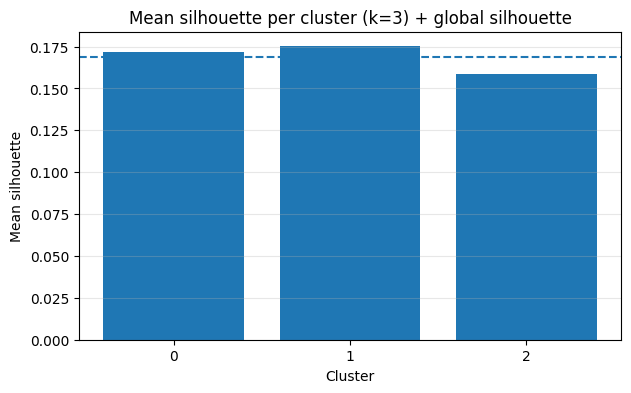

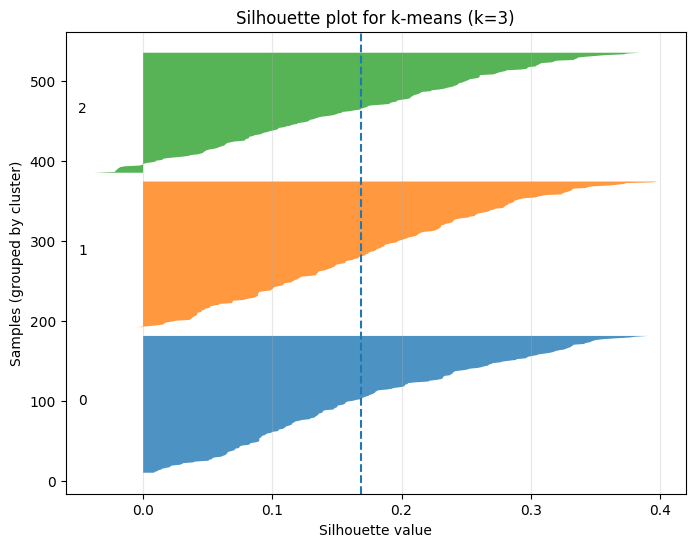

In [12]:
# [write the code here]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

X = responses_ft_pca.values.astype(float)
labels = cluster_labels # pyright: ignore[reportUndefinedVariable]
k = best_k

# Silhouette generale
sil_global = silhouette_score(X, labels)
print(f"Global silhouette score (k={k}): {sil_global:.4f}")

# Silhouette per-sample e media per cluster
sil_samples = silhouette_samples(X, labels)

cluster_sil_means = {}
for c in range(k):
    cluster_sil_means[c] = float(np.mean(sil_samples[labels == c])) # type: ignore

cluster_sil_means = pd.Series(cluster_sil_means).sort_index()
display(cluster_sil_means.to_frame("mean silhouette (cluster)"))

# Barplot silhouette media per cluster + linea silhouette globale
plt.figure(figsize=(7,4))
plt.bar(cluster_sil_means.index.astype(str), cluster_sil_means.values) # type: ignore
plt.axhline(sil_global, linestyle='--') # type: ignore
plt.title(f"Mean silhouette per cluster (k={k}) + global silhouette")
plt.xlabel("Cluster")
plt.ylabel("Mean silhouette")
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Silhouette plot: ogni cluster ha una "banda" di silhouette values ordinate
y_lower = 10  # offset verticale per separare le bande
plt.figure(figsize=(8,6))

for c in range(k):
    vals = sil_samples[labels == c] # type: ignore
    vals_sorted = np.sort(vals)
    size_c = vals_sorted.shape[0]

    y_upper = y_lower + size_c

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals_sorted, alpha=0.8)
    plt.text(-0.05, y_lower + 0.5 * size_c, str(c))  # label cluster

    y_lower = y_upper + 10  # spazio tra cluster

plt.axvline(sil_global, linestyle='--') # type: ignore
plt.title(f"Silhouette plot for k-means (k={k})")
plt.xlabel("Silhouette value")
plt.ylabel("Samples (grouped by cluster)")
plt.grid(True, axis='x', alpha=0.3)
plt.show()


#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...